In [10]:
import pandas as pd
import numpy as np
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)
from modAL.uncertainty import uncertainty_sampling
from modAL.uncertainty import entropy_sampling
from modAL.uncertainty import margin_sampling
from modAL.uncertainty import classifier_uncertainty
from modAL.uncertainty import classifier_margin
from modAL.uncertainty import classifier_entropy
from sklearn.ensemble import RandomForestClassifier
from modAL.models import ActiveLearner
from sklearn.neighbors import KNeighborsClassifier
import matplotlib as mpl

import matplotlib.pyplot as plt

In [11]:
dataset = pd.read_csv("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/glass.data", header = None)

In [12]:
dataset.drop(columns = 0, inplace = True)

In [16]:
X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
y_full = y_full.to_numpy()
n_labeled_examples = X_full.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=round((len(X_full))*0.1))

In [17]:
N_QUERIES_10 = round((len(X_full))*0.1)
N_QUERIES_20 = round((len(X_full))*0.2)
N_QUERIES_30 = round((len(X_full))*0.3)
N_QUERIES_40 = round((len(X_full))*0.4)

# Pool Based

# 10% Additional Labels

In [78]:
X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices]
X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_pool = np.delete(y_full, training_indices, axis=0)
print(X_train.shape)
print(X_pool.shape)

(21, 9)
(194, 9)


Initial prediction accuracy using least confident: 0.565421
Accuracy after query 156: 0.6028
Accuracy after query 160: 0.5888
Accuracy after query 116: 0.5981
Accuracy after query 116: 0.5841
Accuracy after query 151: 0.5981
Accuracy after query 167: 0.6028
Accuracy after query 151: 0.5935
Accuracy after query 160: 0.5841
Accuracy after query 97: 0.6215
Accuracy after query 158: 0.6308
Accuracy after query 173: 0.6449
Accuracy after query 95: 0.6308
Accuracy after query 148: 0.6402
Accuracy after query 97: 0.6355
Accuracy after query 97: 0.6542
Accuracy after query 154: 0.6776
Accuracy after query 145: 0.6402
Accuracy after query 148: 0.6168
Accuracy after query 112: 0.6449
Accuracy after query 144: 0.6262
Accuracy after query 154: 0.6262


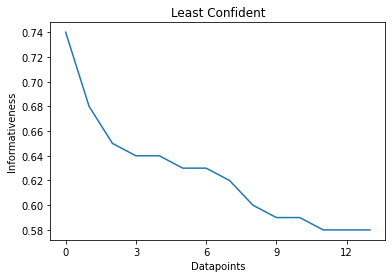

Initial prediction accuracy using margin sampling: 0.579439
Accuracy after query 147: 0.5794
Accuracy after query 166: 0.5841
Accuracy after query 8: 0.5654
Accuracy after query 180: 0.5935
Accuracy after query 96: 0.6121
Accuracy after query 144: 0.5981
Accuracy after query 114: 0.5841
Accuracy after query 130: 0.5841
Accuracy after query 150: 0.5981
Accuracy after query 147: 0.6075
Accuracy after query 147: 0.5794
Accuracy after query 178: 0.5888
Accuracy after query 152: 0.6121
Accuracy after query 48: 0.6215
Accuracy after query 62: 0.6262
Accuracy after query 116: 0.6542
Accuracy after query 55: 0.6308
Accuracy after query 75: 0.6308
Accuracy after query 79: 0.6402
Accuracy after query 109: 0.6636
Accuracy after query 48: 0.6589


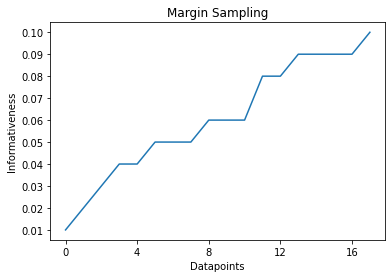

Initial prediction accuracy using entropy: 0.593458
Accuracy after query 117: 0.5841
Accuracy after query 160: 0.5841
Accuracy after query 155: 0.6028
Accuracy after query 169: 0.6121
Accuracy after query 116: 0.6121
Accuracy after query 99: 0.6449
Accuracy after query 99: 0.6215
Accuracy after query 154: 0.6262
Accuracy after query 97: 0.6262
Accuracy after query 148: 0.6168
Accuracy after query 173: 0.6495
Accuracy after query 113: 0.6262
Accuracy after query 146: 0.6449
Accuracy after query 113: 0.6308
Accuracy after query 146: 0.6402
Accuracy after query 96: 0.6542
Accuracy after query 143: 0.6308
Accuracy after query 111: 0.6215
Accuracy after query 150: 0.6308
Accuracy after query 96: 0.6542
Accuracy after query 95: 0.6449


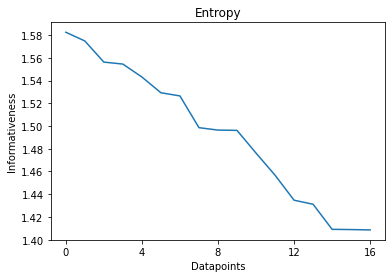

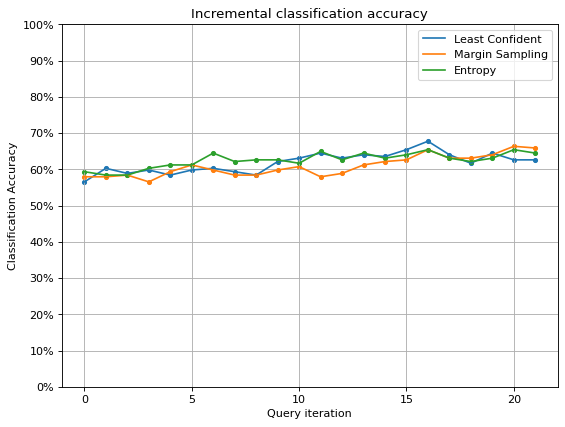

In [18]:
# 10% Additional
X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

rf = RandomForestClassifier()
learner_least_confident = ActiveLearner(estimator=rf, 
                                        X_training=X_train, y_training=y_train, 
                                        query_strategy = classifier_uncertainty)

unqueried_score = learner_least_confident.score(X_full, y_full)
print('Initial prediction accuracy using least confident: %f' % unqueried_score)

X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_pool = np.delete(y_full, training_indices, axis=0)

values = learner_least_confident.query(X_pool)
# values.sort()

performance_history_least_confident_10 = [unqueried_score]
dicti = {}
for i in range(N_QUERIES_10):
    top_index = np.argmax(values)
    top_value = values[top_index]
    X, y = X_pool[top_index].reshape(1,-1), y_pool[top_index].reshape(1,)
    learner_least_confident.teach(X=X, y=y)
    model_accuracy = learner_least_confident.score(X_full, y_full)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=top_index + 1, acc=model_accuracy))
    performance_history_least_confident_10.append(model_accuracy)
    values = np.delete(values, top_index)
    dict1 = {top_index:top_value}
    dicti.update(dict1)
    
sort_dict = sorted(dicti.items(), key=lambda x: x[1], reverse=True)

import collections

dicti = collections.OrderedDict(sort_dict)
 # Create list
from matplotlib.pyplot import figure

fig, ax = plt.subplots()
ax.plot(list(dicti.values()))
ax.set_xlabel("Datapoints")
ax.set_ylabel("Informativeness")
ax.set_title("Least Confident")
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10)) 
plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/lc_10.png")
plt.show()  


X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

rf = RandomForestClassifier()
learner_margin = ActiveLearner(estimator=rf, 
                                        X_training=X_train, y_training=y_train, 
                                        query_strategy = classifier_margin)

unqueried_score = learner_margin.score(X_full, y_full)
print('Initial prediction accuracy using margin sampling: %f' % unqueried_score)

X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_pool = np.delete(y_full, training_indices, axis=0)

values = learner_margin.query(X_pool)
# values.sort()

performance_history_margin_10 = [unqueried_score]
dicti = {}
for i in range(N_QUERIES_10):
    lowest_index = np.argmin(values)
    lowest_value = values[lowest_index]
    X, y = X_pool[lowest_index].reshape(1,-1), y_pool[lowest_index].reshape(1,)
    learner_margin.teach(X=X, y=y)
    model_accuracy = learner_margin.score(X_full, y_full)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=lowest_index + 1, acc=model_accuracy))
    performance_history_margin_10.append(model_accuracy)
    values = np.delete(values, lowest_index)
    dict1 = {lowest_index:lowest_value}
    dicti.update(dict1)
    
sort_dict = sorted(dicti.items(), key=lambda x: x[1])

import collections

dicti = collections.OrderedDict(sort_dict)
 # Create list
from matplotlib.pyplot import figure
fig, ax = plt.subplots()
ax.plot(list(dicti.values()))
ax.set_xlabel("Datapoints")
ax.set_ylabel("Informativeness")
ax.set_title("Margin Sampling")
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/margin_10.png")
plt.show()  

X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

rf = RandomForestClassifier()
learner_entropy = ActiveLearner(estimator=rf, 
                                        X_training=X_train, y_training=y_train, 
                                        query_strategy = classifier_entropy)

unqueried_score = learner_entropy.score(X_full, y_full)
print('Initial prediction accuracy using entropy: %f' % unqueried_score)

X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_pool = np.delete(y_full, training_indices, axis=0)

values = learner_entropy.query(X_pool)
# values.sort()

performance_history_entropy_10 = [unqueried_score]
dicti = {}
for i in range(N_QUERIES_10):
    top_index = np.argmax(values)
    top_value = values[top_index]
    X, y = X_pool[top_index].reshape(1,-1), y_pool[top_index].reshape(1,)
    learner_entropy.teach(X=X, y=y)
    model_accuracy = learner_entropy.score(X_full, y_full)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=top_index + 1, acc=model_accuracy))
    performance_history_entropy_10.append(model_accuracy)
    values = np.delete(values, top_index)
    dict1 = {top_index:top_value}
    dicti.update(dict1)
    
sort_dict = sorted(dicti.items(), key=lambda x: x[1], reverse=True)

import collections

dicti = collections.OrderedDict(sort_dict)
 # Create list
from matplotlib.pyplot import figure
fig, ax = plt.subplots()
ax.plot(list(dicti.values()))
ax.set_xlabel("Datapoints")
ax.set_ylabel("Informativeness")
ax.set_title("Entropy")
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/entropy_10.png")
plt.show()  


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

ax.plot(performance_history_least_confident_10, label = "Least Confident")
ax.plot(performance_history_margin_10, label = "Margin Sampling")
ax.plot(performance_history_entropy_10, label = "Entropy")
ax.scatter(range(len(performance_history_least_confident_10)), performance_history_least_confident_10, s=13)
ax.scatter(range(len(performance_history_margin_10)), performance_history_margin_10, s=13)
ax.scatter(range(len(performance_history_entropy_10)), performance_history_entropy_10, s=13)
leg = ax.legend()
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/acc_10.png")

plt.show()


# 20% Additional Labels

Initial prediction accuracy using least confident: 0.579439
Accuracy after query 117: 0.5748
Accuracy after query 155: 0.5981
Accuracy after query 159: 0.6028
Accuracy after query 116: 0.5981
Accuracy after query 156: 0.6028
Accuracy after query 117: 0.5935
Accuracy after query 150: 0.6215
Accuracy after query 159: 0.5981
Accuracy after query 159: 0.6262
Accuracy after query 174: 0.6121
Accuracy after query 97: 0.6262
Accuracy after query 115: 0.6262
Accuracy after query 149: 0.6262
Accuracy after query 155: 0.6075
Accuracy after query 98: 0.6308
Accuracy after query 98: 0.6262
Accuracy after query 97: 0.6215
Accuracy after query 111: 0.6262
Accuracy after query 143: 0.6402
Accuracy after query 143: 0.6308
Accuracy after query 96: 0.6449
Accuracy after query 141: 0.6729
Accuracy after query 95: 0.6682
Accuracy after query 64: 0.6542
Accuracy after query 142: 0.6449
Accuracy after query 148: 0.6636
Accuracy after query 163: 0.6542
Accuracy after query 57: 0.6729
Accuracy after query 143

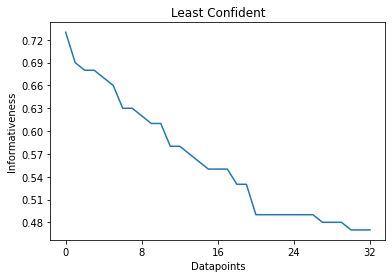

Initial prediction accuracy using margin sampling: 0.579439
Accuracy after query 50: 0.6028
Accuracy after query 53: 0.6916
Accuracy after query 160: 0.6869
Accuracy after query 77: 0.6916
Accuracy after query 128: 0.6963
Accuracy after query 150: 0.6449
Accuracy after query 177: 0.6822
Accuracy after query 94: 0.7290
Accuracy after query 160: 0.6869
Accuracy after query 40: 0.6869
Accuracy after query 80: 0.6869
Accuracy after query 8: 0.7243
Accuracy after query 138: 0.7290
Accuracy after query 60: 0.7150
Accuracy after query 88: 0.7150
Accuracy after query 107: 0.7243
Accuracy after query 33: 0.7103
Accuracy after query 80: 0.7150
Accuracy after query 171: 0.7336
Accuracy after query 14: 0.7383
Accuracy after query 26: 0.7056
Accuracy after query 28: 0.7009
Accuracy after query 136: 0.7150
Accuracy after query 56: 0.7103
Accuracy after query 68: 0.7103
Accuracy after query 125: 0.7336
Accuracy after query 132: 0.7243
Accuracy after query 133: 0.7243
Accuracy after query 43: 0.7570
A

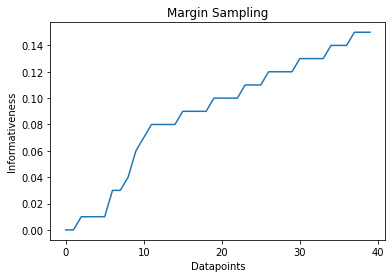

Initial prediction accuracy using entropy: 0.574766
Accuracy after query 153: 0.6121
Accuracy after query 160: 0.5935
Accuracy after query 155: 0.5888
Accuracy after query 117: 0.6308
Accuracy after query 97: 0.6168
Accuracy after query 155: 0.6168
Accuracy after query 152: 0.6308
Accuracy after query 116: 0.6308
Accuracy after query 149: 0.6215
Accuracy after query 115: 0.6215
Accuracy after query 147: 0.6355
Accuracy after query 161: 0.6308
Accuracy after query 147: 0.6449
Accuracy after query 98: 0.6168
Accuracy after query 98: 0.6355
Accuracy after query 113: 0.6449
Accuracy after query 112: 0.6262
Accuracy after query 151: 0.6308
Accuracy after query 97: 0.6262
Accuracy after query 142: 0.6308
Accuracy after query 142: 0.6215
Accuracy after query 162: 0.6449
Accuracy after query 147: 0.6355
Accuracy after query 95: 0.6449
Accuracy after query 165: 0.6542
Accuracy after query 95: 0.6402
Accuracy after query 141: 0.6636
Accuracy after query 95: 0.6589
Accuracy after query 147: 0.640

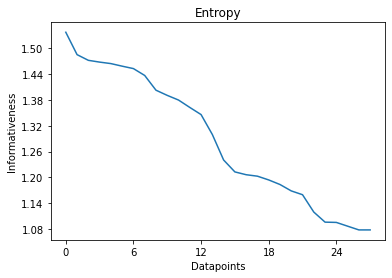

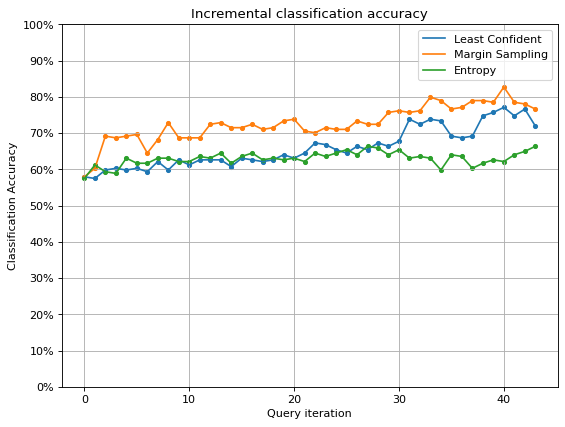

In [20]:

X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

rf = RandomForestClassifier()
learner_least_confident = ActiveLearner(estimator=rf, 
                                        X_training=X_train, y_training=y_train, 
                                        query_strategy = classifier_uncertainty)

unqueried_score = learner_least_confident.score(X_full, y_full)
print('Initial prediction accuracy using least confident: %f' % unqueried_score)

X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_pool = np.delete(y_full, training_indices, axis=0)

values = learner_least_confident.query(X_pool)
# values.sort()

performance_history_least_confident_20 = [unqueried_score]
dicti = {}
for i in range(N_QUERIES_20):
    top_index = np.argmax(values)
    top_value = values[top_index]
    X, y = X_pool[top_index].reshape(1,-1), y_pool[top_index].reshape(1,)
    learner_least_confident.teach(X=X, y=y)
    model_accuracy = learner_least_confident.score(X_full, y_full)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=top_index + 1, acc=model_accuracy))
    performance_history_least_confident_20.append(model_accuracy)
    values = np.delete(values, top_index)
    dict1 = {top_index:top_value}
    dicti.update(dict1)
    
sort_dict = sorted(dicti.items(), key=lambda x: x[1], reverse=True)

import collections

dicti = collections.OrderedDict(sort_dict)
 # Create list
from matplotlib.pyplot import figure

fig, ax = plt.subplots()
ax.plot(list(dicti.values()))
ax.set_xlabel("Datapoints")
ax.set_ylabel("Informativeness")
ax.set_title("Least Confident")
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10)) 
plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/lc_20.png")
plt.show()  


X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

rf = RandomForestClassifier()
learner_margin = ActiveLearner(estimator=rf, 
                                        X_training=X_train, y_training=y_train, 
                                        query_strategy = classifier_margin)

unqueried_score = learner_margin.score(X_full, y_full)
print('Initial prediction accuracy using margin sampling: %f' % unqueried_score)

X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_pool = np.delete(y_full, training_indices, axis=0)

values = learner_margin.query(X_pool)
# values.sort()

performance_history_margin_20 = [unqueried_score]
dicti = {}
for i in range(N_QUERIES_20):
    lowest_index = np.argmin(values)
    lowest_value = values[lowest_index]
    X, y = X_pool[lowest_index].reshape(1,-1), y_pool[lowest_index].reshape(1,)
    learner_margin.teach(X=X, y=y)
    model_accuracy = learner_margin.score(X_full, y_full)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=lowest_index + 1, acc=model_accuracy))
    performance_history_margin_20.append(model_accuracy)
    values = np.delete(values, lowest_index)
    dict1 = {lowest_index:lowest_value}
    dicti.update(dict1)
    
sort_dict = sorted(dicti.items(), key=lambda x: x[1])

import collections

dicti = collections.OrderedDict(sort_dict)
 # Create list
from matplotlib.pyplot import figure
fig, ax = plt.subplots()
ax.plot(list(dicti.values()))
ax.set_xlabel("Datapoints")
ax.set_ylabel("Informativeness")
ax.set_title("Margin Sampling")
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/margin_20.png")
plt.show()  

X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

rf = RandomForestClassifier()
learner_entropy = ActiveLearner(estimator=rf, 
                                        X_training=X_train, y_training=y_train, 
                                        query_strategy = classifier_entropy)

unqueried_score = learner_entropy.score(X_full, y_full)
print('Initial prediction accuracy using entropy: %f' % unqueried_score)

X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_pool = np.delete(y_full, training_indices, axis=0)

values = learner_entropy.query(X_pool)
# values.sort()

performance_history_entropy_20 = [unqueried_score]
dicti = {}
for i in range(N_QUERIES_20):
    top_index = np.argmax(values)
    top_value = values[top_index]
    X, y = X_pool[top_index].reshape(1,-1), y_pool[top_index].reshape(1,)
    learner_entropy.teach(X=X, y=y)
    model_accuracy = learner_entropy.score(X_full, y_full)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=top_index + 1, acc=model_accuracy))
    performance_history_entropy_20.append(model_accuracy)
    values = np.delete(values, top_index)
    dict1 = {top_index:top_value}
    dicti.update(dict1)
    
sort_dict = sorted(dicti.items(), key=lambda x: x[1], reverse=True)

import collections

dicti = collections.OrderedDict(sort_dict)
 # Create list
from matplotlib.pyplot import figure
fig, ax = plt.subplots()
ax.plot(list(dicti.values()))
ax.set_xlabel("Datapoints")
ax.set_ylabel("Informativeness")
ax.set_title("Entropy")
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/entropy_20.png")
plt.show()  


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

ax.plot(performance_history_least_confident_20, label = "Least Confident")
ax.plot(performance_history_margin_20, label = "Margin Sampling")
ax.plot(performance_history_entropy_20, label = "Entropy")
ax.scatter(range(len(performance_history_least_confident_20)), performance_history_least_confident_20, s=13)
ax.scatter(range(len(performance_history_margin_20)), performance_history_margin_20, s=13)
ax.scatter(range(len(performance_history_entropy_20)), performance_history_entropy_20, s=13)
leg = ax.legend()
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/acc_20.png")

plt.show()


# 30 % Additional Labels

Initial prediction accuracy using least confident: 0.579439
Accuracy after query 156: 0.5794
Accuracy after query 160: 0.5794
Accuracy after query 153: 0.5981
Accuracy after query 117: 0.6402
Accuracy after query 179: 0.5981
Accuracy after query 116: 0.5981
Accuracy after query 150: 0.6121
Accuracy after query 154: 0.6075
Accuracy after query 149: 0.6308
Accuracy after query 150: 0.6215
Accuracy after query 117: 0.6449
Accuracy after query 97: 0.6589
Accuracy after query 114: 0.6168
Accuracy after query 114: 0.6355
Accuracy after query 154: 0.6308
Accuracy after query 98: 0.6355
Accuracy after query 98: 0.6121
Accuracy after query 143: 0.6495
Accuracy after query 97: 0.6168
Accuracy after query 145: 0.6402
Accuracy after query 153: 0.6262
Accuracy after query 64: 0.5981
Accuracy after query 147: 0.6215
Accuracy after query 57: 0.6449
Accuracy after query 136: 0.6355
Accuracy after query 164: 0.6542
Accuracy after query 93: 0.6869
Accuracy after query 36: 0.6682
Accuracy after query 143

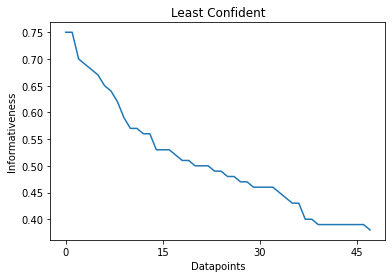

Initial prediction accuracy using margin sampling: 0.598131
Accuracy after query 15: 0.6449
Accuracy after query 139: 0.6495
Accuracy after query 64: 0.6495
Accuracy after query 96: 0.7009
Accuracy after query 118: 0.6869
Accuracy after query 156: 0.7056
Accuracy after query 165: 0.7056
Accuracy after query 23: 0.7103
Accuracy after query 52: 0.6729
Accuracy after query 75: 0.7243
Accuracy after query 173: 0.7150
Accuracy after query 90: 0.7383
Accuracy after query 29: 0.7897
Accuracy after query 37: 0.7103
Accuracy after query 41: 0.7570
Accuracy after query 58: 0.7897
Accuracy after query 173: 0.7383
Accuracy after query 75: 0.7804
Accuracy after query 128: 0.7664
Accuracy after query 45: 0.7523
Accuracy after query 85: 0.7570
Accuracy after query 137: 0.7570
Accuracy after query 143: 0.7430
Accuracy after query 69: 0.7850
Accuracy after query 76: 0.7757
Accuracy after query 114: 0.7804
Accuracy after query 123: 0.7664
Accuracy after query 132: 0.7523
Accuracy after query 101: 0.7850

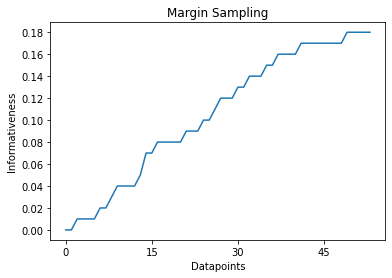

Initial prediction accuracy using entropy: 0.574766
Accuracy after query 161: 0.5935
Accuracy after query 156: 0.5935
Accuracy after query 117: 0.5888
Accuracy after query 169: 0.6121
Accuracy after query 157: 0.6215
Accuracy after query 97: 0.6495
Accuracy after query 115: 0.6589
Accuracy after query 115: 0.6308
Accuracy after query 149: 0.6495
Accuracy after query 98: 0.6355
Accuracy after query 98: 0.6542
Accuracy after query 112: 0.6355
Accuracy after query 112: 0.6262
Accuracy after query 170: 0.6402
Accuracy after query 96: 0.6589
Accuracy after query 95: 0.6308
Accuracy after query 144: 0.6589
Accuracy after query 151: 0.6449
Accuracy after query 151: 0.6449
Accuracy after query 142: 0.6449
Accuracy after query 96: 0.6495
Accuracy after query 142: 0.6729
Accuracy after query 142: 0.6495
Accuracy after query 141: 0.6542
Accuracy after query 145: 0.6682
Accuracy after query 149: 0.6355
Accuracy after query 163: 0.6449
Accuracy after query 140: 0.6542
Accuracy after query 143: 0.64

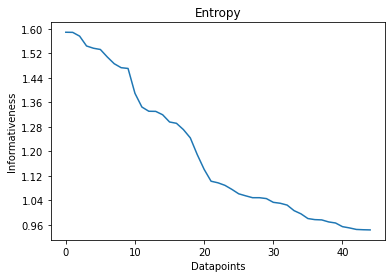

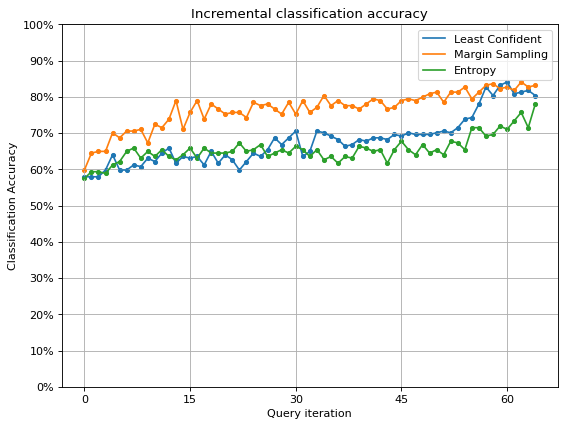

In [29]:

X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

rf = RandomForestClassifier()
learner_least_confident = ActiveLearner(estimator=rf, 
                                        X_training=X_train, y_training=y_train, 
                                        query_strategy = classifier_uncertainty)

unqueried_score = learner_least_confident.score(X_full, y_full)
print('Initial prediction accuracy using least confident: %f' % unqueried_score)

X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_pool = np.delete(y_full, training_indices, axis=0)

values = learner_least_confident.query(X_pool)
# values.sort()

performance_history_least_confident_30 = [unqueried_score]
dicti = {}
for i in range(N_QUERIES_30):
    top_index = np.argmax(values)
    top_value = values[top_index]
    X, y = X_pool[top_index].reshape(1,-1), y_pool[top_index].reshape(1,)
    learner_least_confident.teach(X=X, y=y)
    model_accuracy = learner_least_confident.score(X_full, y_full)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=top_index + 1, acc=model_accuracy))
    performance_history_least_confident_30.append(model_accuracy)
    values = np.delete(values, top_index)
    dict1 = {top_index:top_value}
    dicti.update(dict1)
    
sort_dict = sorted(dicti.items(), key=lambda x: x[1], reverse=True)

import collections

dicti = collections.OrderedDict(sort_dict)
 # Create list
from matplotlib.pyplot import figure

fig, ax = plt.subplots()
ax.plot(list(dicti.values()))
ax.set_xlabel("Datapoints")
ax.set_ylabel("Informativeness")
ax.set_title("Least Confident")
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10)) 
plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/lc_30.png")
plt.show()  


X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

rf = RandomForestClassifier()
learner_margin = ActiveLearner(estimator=rf, 
                                        X_training=X_train, y_training=y_train, 
                                        query_strategy = classifier_margin)

unqueried_score = learner_margin.score(X_full, y_full)
print('Initial prediction accuracy using margin sampling: %f' % unqueried_score)

X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_pool = np.delete(y_full, training_indices, axis=0)

values = learner_margin.query(X_pool)
# values.sort()

performance_history_margin_30 = [unqueried_score]
dicti = {}
for i in range(N_QUERIES_30):
    lowest_index = np.argmin(values)
    lowest_value = values[lowest_index]
    X, y = X_pool[lowest_index].reshape(1,-1), y_pool[lowest_index].reshape(1,)
    learner_margin.teach(X=X, y=y)
    model_accuracy = learner_margin.score(X_full, y_full)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=lowest_index + 1, acc=model_accuracy))
    performance_history_margin_30.append(model_accuracy)
    values = np.delete(values, lowest_index)
    dict1 = {lowest_index:lowest_value}
    dicti.update(dict1)
    
sort_dict = sorted(dicti.items(), key=lambda x: x[1])

import collections

dicti = collections.OrderedDict(sort_dict)
 # Create list
from matplotlib.pyplot import figure
fig, ax = plt.subplots()
ax.plot(list(dicti.values()))
ax.set_xlabel("Datapoints")
ax.set_ylabel("Informativeness")
ax.set_title("Margin Sampling")
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/margin_30.png")
plt.show()  

X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

rf = RandomForestClassifier()
learner_entropy = ActiveLearner(estimator=rf, 
                                        X_training=X_train, y_training=y_train, 
                                        query_strategy = classifier_entropy)

unqueried_score = learner_entropy.score(X_full, y_full)
print('Initial prediction accuracy using entropy: %f' % unqueried_score)

X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_pool = np.delete(y_full, training_indices, axis=0)

values = learner_entropy.query(X_pool)
# values.sort()

performance_history_entropy_30 = [unqueried_score]
dicti = {}
for i in range(N_QUERIES_30):
    top_index = np.argmax(values)
    top_value = values[top_index]
    X, y = X_pool[top_index].reshape(1,-1), y_pool[top_index].reshape(1,)
    learner_entropy.teach(X=X, y=y)
    model_accuracy = learner_entropy.score(X_full, y_full)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=top_index + 1, acc=model_accuracy))
    performance_history_entropy_30.append(model_accuracy)
    values = np.delete(values, top_index)
    dict1 = {top_index:top_value}
    dicti.update(dict1)
    
sort_dict = sorted(dicti.items(), key=lambda x: x[1], reverse=True)

import collections

dicti = collections.OrderedDict(sort_dict)
 # Create list
from matplotlib.pyplot import figure
fig, ax = plt.subplots()
ax.plot(list(dicti.values()))
ax.set_xlabel("Datapoints")
ax.set_ylabel("Informativeness")
ax.set_title("Entropy")
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/entropy_30.png")
plt.show()  


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

ax.plot(performance_history_least_confident_30, label = "Least Confident")
ax.plot(performance_history_margin_30, label = "Margin Sampling")
ax.plot(performance_history_entropy_30, label = "Entropy")
ax.scatter(range(len(performance_history_least_confident_30)), performance_history_least_confident_30, s=13)
ax.scatter(range(len(performance_history_margin_30)), performance_history_margin_30, s=13)
ax.scatter(range(len(performance_history_entropy_30)), performance_history_entropy_30, s=13)
leg = ax.legend()
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/acc_30.png")

plt.show()


# 40% Additional Labels

Initial prediction accuracy using least confident: 0.584112
Accuracy after query 156: 0.6075
Accuracy after query 117: 0.6075
Accuracy after query 159: 0.5981
Accuracy after query 97: 0.6168
Accuracy after query 115: 0.6028
Accuracy after query 116: 0.6028
Accuracy after query 154: 0.5935
Accuracy after query 165: 0.6168
Accuracy after query 57: 0.6262
Accuracy after query 114: 0.6075
Accuracy after query 148: 0.6168
Accuracy after query 162: 0.6215
Accuracy after query 171: 0.6215
Accuracy after query 147: 0.6308
Accuracy after query 156: 0.6168
Accuracy after query 145: 0.6355
Accuracy after query 145: 0.6355
Accuracy after query 113: 0.6355
Accuracy after query 63: 0.6262
Accuracy after query 147: 0.6215
Accuracy after query 169: 0.6542
Accuracy after query 36: 0.6589
Accuracy after query 142: 0.6589
Accuracy after query 148: 0.6636
Accuracy after query 148: 0.6542
Accuracy after query 138: 0.6636
Accuracy after query 48: 0.6495
Accuracy after query 91: 0.6682
Accuracy after query 7

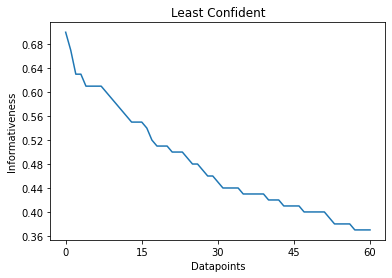

Initial prediction accuracy using margin sampling: 0.570093
Accuracy after query 79: 0.5794
Accuracy after query 154: 0.5888
Accuracy after query 187: 0.5841
Accuracy after query 132: 0.5935
Accuracy after query 153: 0.5981
Accuracy after query 15: 0.6308
Accuracy after query 144: 0.6449
Accuracy after query 8: 0.6168
Accuracy after query 38: 0.6729
Accuracy after query 61: 0.6682
Accuracy after query 61: 0.6449
Accuracy after query 29: 0.6822
Accuracy after query 45: 0.6822
Accuracy after query 144: 0.6729
Accuracy after query 46: 0.7009
Accuracy after query 50: 0.6963
Accuracy after query 74: 0.6916
Accuracy after query 139: 0.6869
Accuracy after query 150: 0.7056
Accuracy after query 84: 0.7196
Accuracy after query 104: 0.7009
Accuracy after query 132: 0.6963
Accuracy after query 142: 0.7336
Accuracy after query 141: 0.7150
Accuracy after query 33: 0.7477
Accuracy after query 44: 0.7523
Accuracy after query 116: 0.7570
Accuracy after query 26: 0.7617
Accuracy after query 145: 0.7570

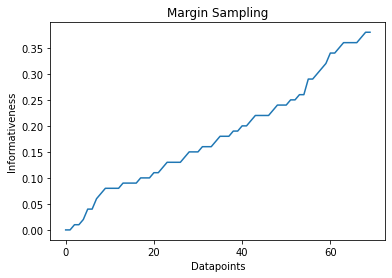

Initial prediction accuracy using entropy: 0.588785
Accuracy after query 161: 0.5981
Accuracy after query 156: 0.5841
Accuracy after query 117: 0.5935
Accuracy after query 169: 0.5981
Accuracy after query 116: 0.6028
Accuracy after query 151: 0.6028
Accuracy after query 177: 0.6308
Accuracy after query 116: 0.6215
Accuracy after query 154: 0.6028
Accuracy after query 97: 0.6215
Accuracy after query 98: 0.6355
Accuracy after query 149: 0.6308
Accuracy after query 147: 0.6168
Accuracy after query 98: 0.6355
Accuracy after query 112: 0.6308
Accuracy after query 112: 0.6355
Accuracy after query 143: 0.6449
Accuracy after query 152: 0.6542
Accuracy after query 143: 0.6168
Accuracy after query 150: 0.6682
Accuracy after query 96: 0.6495
Accuracy after query 168: 0.6449
Accuracy after query 96: 0.6776
Accuracy after query 95: 0.6729
Accuracy after query 146: 0.6589
Accuracy after query 95: 0.6869
Accuracy after query 139: 0.6589
Accuracy after query 139: 0.6729
Accuracy after query 147: 0.668

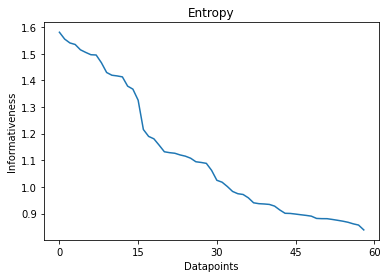

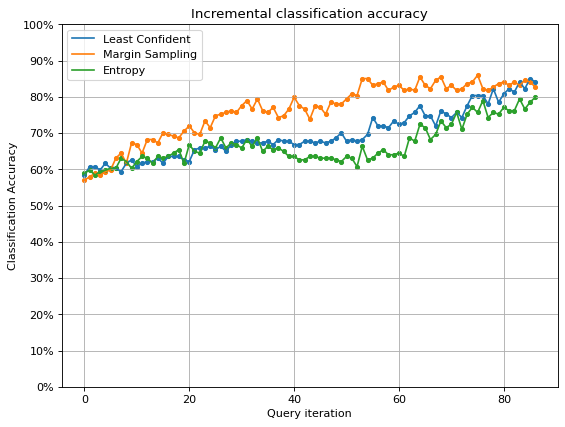

In [22]:

X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

rf = RandomForestClassifier()
learner_least_confident = ActiveLearner(estimator=rf, 
                                        X_training=X_train, y_training=y_train, 
                                        query_strategy = classifier_uncertainty)

unqueried_score = learner_least_confident.score(X_full, y_full)
print('Initial prediction accuracy using least confident: %f' % unqueried_score)

X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_pool = np.delete(y_full, training_indices, axis=0)

values = learner_least_confident.query(X_pool)
# values.sort()

performance_history_least_confident_40 = [unqueried_score]
dicti = {}
for i in range(N_QUERIES_40):
    top_index = np.argmax(values)
    top_value = values[top_index]
    X, y = X_pool[top_index].reshape(1,-1), y_pool[top_index].reshape(1,)
    learner_least_confident.teach(X=X, y=y)
    model_accuracy = learner_least_confident.score(X_full, y_full)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=top_index + 1, acc=model_accuracy))
    performance_history_least_confident_40.append(model_accuracy)
    values = np.delete(values, top_index)
    dict1 = {top_index:top_value}
    dicti.update(dict1)
    
sort_dict = sorted(dicti.items(), key=lambda x: x[1], reverse=True)

import collections

dicti = collections.OrderedDict(sort_dict)
 # Create list
from matplotlib.pyplot import figure

fig, ax = plt.subplots()
ax.plot(list(dicti.values()))
ax.set_xlabel("Datapoints")
ax.set_ylabel("Informativeness")
ax.set_title("Least Confident")
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10)) 
plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/lc_40.png")
plt.show()  


X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

rf = RandomForestClassifier()
learner_margin = ActiveLearner(estimator=rf, 
                                        X_training=X_train, y_training=y_train, 
                                        query_strategy = classifier_margin)

unqueried_score = learner_margin.score(X_full, y_full)
print('Initial prediction accuracy using margin sampling: %f' % unqueried_score)

X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_pool = np.delete(y_full, training_indices, axis=0)

values = learner_margin.query(X_pool)
# values.sort()

performance_history_margin_40 = [unqueried_score]
dicti = {}
for i in range(N_QUERIES_40):
    lowest_index = np.argmin(values)
    lowest_value = values[lowest_index]
    X, y = X_pool[lowest_index].reshape(1,-1), y_pool[lowest_index].reshape(1,)
    learner_margin.teach(X=X, y=y)
    model_accuracy = learner_margin.score(X_full, y_full)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=lowest_index + 1, acc=model_accuracy))
    performance_history_margin_40.append(model_accuracy)
    values = np.delete(values, lowest_index)
    dict1 = {lowest_index:lowest_value}
    dicti.update(dict1)
    
sort_dict = sorted(dicti.items(), key=lambda x: x[1])

import collections

dicti = collections.OrderedDict(sort_dict)
 # Create list
from matplotlib.pyplot import figure
fig, ax = plt.subplots()
ax.plot(list(dicti.values()))
ax.set_xlabel("Datapoints")
ax.set_ylabel("Informativeness")
ax.set_title("Margin Sampling")
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/margin_40.png")
plt.show()  

X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

rf = RandomForestClassifier()
learner_entropy = ActiveLearner(estimator=rf, 
                                        X_training=X_train, y_training=y_train, 
                                        query_strategy = classifier_entropy)

unqueried_score = learner_entropy.score(X_full, y_full)
print('Initial prediction accuracy using entropy: %f' % unqueried_score)

X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_pool = np.delete(y_full, training_indices, axis=0)

values = learner_entropy.query(X_pool)
# values.sort()

performance_history_entropy_40 = [unqueried_score]
dicti = {}
for i in range(N_QUERIES_40):
    top_index = np.argmax(values)
    top_value = values[top_index]
    X, y = X_pool[top_index].reshape(1,-1), y_pool[top_index].reshape(1,)
    learner_entropy.teach(X=X, y=y)
    model_accuracy = learner_entropy.score(X_full, y_full)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=top_index + 1, acc=model_accuracy))
    performance_history_entropy_40.append(model_accuracy)
    values = np.delete(values, top_index)
    dict1 = {top_index:top_value}
    dicti.update(dict1)
    
sort_dict = sorted(dicti.items(), key=lambda x: x[1], reverse=True)

import collections

dicti = collections.OrderedDict(sort_dict)
 # Create list
from matplotlib.pyplot import figure
fig, ax = plt.subplots()
ax.plot(list(dicti.values()))
ax.set_xlabel("Datapoints")
ax.set_ylabel("Informativeness")
ax.set_title("Entropy")
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/entropy_40.png")
plt.show()  


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

ax.plot(performance_history_least_confident_40, label = "Least Confident")
ax.plot(performance_history_margin_40, label = "Margin Sampling")
ax.plot(performance_history_entropy_40, label = "Entropy")
ax.scatter(range(len(performance_history_least_confident_40)), performance_history_least_confident_40, s=13)
ax.scatter(range(len(performance_history_margin_40)), performance_history_margin_40, s=13)
ax.scatter(range(len(performance_history_entropy_40)), performance_history_entropy_40, s=13)
leg = ax.legend()
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/acc_40.png")

plt.show()

In [25]:
from copy import deepcopy
lc_10 = deepcopy(performance_history_least_confident_10)
lc_20 = deepcopy(performance_history_least_confident_20)
lc_30 = deepcopy(performance_history_least_confident_30)
lc_40 = deepcopy(performance_history_least_confident_40)
margin_10 = deepcopy(performance_history_margin_10)
margin_20 = deepcopy(performance_history_margin_20)
margin_30 = deepcopy(performance_history_margin_30)
margin_40 = deepcopy(performance_history_margin_40)
entropy_10 = deepcopy(performance_history_entropy_10)
entropy_20 = deepcopy(performance_history_entropy_20)
entropy_30 = deepcopy(performance_history_entropy_30)
entropy_40 = deepcopy(performance_history_entropy_40)

# Part 4

# 10% Additional Labels - Margin Sampling

Accuracy after query [84]: 0.5888
Accuracy after query [89]: 0.5654
Accuracy after query [98]: 0.5607
Accuracy after query [76]: 0.5654
Accuracy after query [124]: 0.5607
Accuracy after query [105]: 0.5654
Accuracy after query [84]: 0.5654
Accuracy after query [150]: 0.5748
Accuracy after query [52]: 0.5981
Accuracy after query [65]: 0.5654
Accuracy after query [48]: 0.5888
Accuracy after query [12]: 0.5794
Accuracy after query [168]: 0.5981
Accuracy after query [96]: 0.5841
Accuracy after query [98]: 0.6168
Accuracy after query [23]: 0.6355
Accuracy after query [72]: 0.6121
Accuracy after query [39]: 0.6869
Accuracy after query [41]: 0.6589
Accuracy after query [141]: 0.6776
Accuracy after query [74]: 0.6729
Row no. 78 queried, new accuracy: 0.588785
Row no. 86 queried, new accuracy: 0.584112
Row no. 50 queried, new accuracy: 0.588785
Row no. 152 queried, new accuracy: 0.602804
Row no. 114 queried, new accuracy: 0.602804
Row no. 145 queried, new accuracy: 0.602804
Row no. 112 queried,

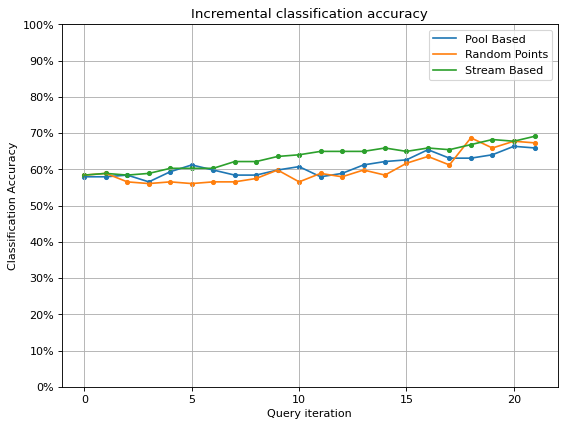

In [60]:
X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

rf = RandomForestClassifier()
learner_random = ActiveLearner(estimator=rf, 
                                        X_training=X_train, y_training=y_train, 
                                        query_strategy = classifier_margin)
unqueried_score = learner_random.score(X_full, y_full)
#print('Initial prediction accuracy using margin: %f' % unqueried_score)

X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_pool = np.delete(y_full, training_indices, axis=0)

values = learner_random.query(X_pool)
# values.sort()

performance_history_random_10 = [unqueried_score]
random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
dicti = {}
for i in range(N_QUERIES_10):
    random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
    X, y = X_pool[random].reshape(1,-1), y_pool[random].reshape(1,)
    learner_random.teach(X=X, y=y)
    model_accuracy = learner_random.score(X_full, y_full)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=random + 1, acc=model_accuracy))
    performance_history_random_10.append(model_accuracy)
    X_pool = np.delete(X_pool, random, axis = 0)
    y_pool = np.delete(y_pool, random)

X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
#y_full = y_full.apply(crop_to_numeric)
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices]

learner_stream = ActiveLearner(
    estimator=RandomForestClassifier(),
    X_training=X_train, y_training=y_train,
    query_strategy = margin_sampling
)
unqueried_score = learner_stream.score(X_full, y_full)
performance_history_stream_10 = [unqueried_score]

X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_stream = np.delete(y_full, training_indices, axis=0)

# stream_idx = np.random.choice(range(len(X_stream)))
# classifier_margin(learner_stream, X_stream[stream_idx].reshape(1, -1))
i = 0
while(1):
    stream_idx = np.random.choice(range(len(X_stream)))
    if classifier_margin(learner_stream, X_stream[stream_idx].reshape(1, -1)) <= 0.1:
        i = i+1
        learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
        new_score = learner_stream.score(X_full, y_full)
        performance_history_stream_10.append(new_score)
        X_stream = np.delete(X_stream, stream_idx, axis = 0)
        y_stream = np.delete(y_stream, stream_idx, axis = 0)
        print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))
        if i == N_QUERIES_10:
            break

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

ax.plot(performance_history_margin_10, label = "Pool Based")
ax.plot(performance_history_random_10, label = "Random Points")
ax.plot(performance_history_stream_10, label = "Stream Based")
ax.scatter(range(len(performance_history_margin_10)), performance_history_margin_10, s=13)
ax.scatter(range(len(performance_history_random_10)), performance_history_random_10, s=13)
ax.scatter(range(len(performance_history_stream_10)), performance_history_stream_10, s=13)
leg = ax.legend()
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/part4_test_10.png")

plt.show()

In [ ]:
# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

# rf = RandomForestClassifier()
# learner_random = ActiveLearner(estimator=rf, 
#                                         X_training=X_train, y_training=y_train, 
#                                         query_strategy = classifier_margin)
# unqueried_score = learner_random.score(X_full, y_full)
# #print('Initial prediction accuracy using margin: %f' % unqueried_score)

# X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_pool = np.delete(y_full, training_indices, axis=0)

# values = learner_random.query(X_pool)
# # values.sort()

# performance_history_random_10 = [unqueried_score]
# random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
# dicti = {}
# for i in range(N_QUERIES_10):
#     random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
#     X, y = X_pool[random].reshape(1,-1), y_pool[random].reshape(1,)
#     learner_random.teach(X=X, y=y)
#     model_accuracy = learner_random.score(X_full, y_full)
#     print('Accuracy after query {n}: {acc:0.4f}'.format(n=random + 1, acc=model_accuracy))
#     performance_history_random_10.append(model_accuracy)
#     X_pool = np.delete(X_pool, random, axis = 0)
#     y_pool = np.delete(y_pool, random)

# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# #y_full = y_full.apply(crop_to_numeric)
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices]

# learner_stream = ActiveLearner(
#     estimator=RandomForestClassifier(),
#     X_training=X_train, y_training=y_train,
#     query_strategy = margin_sampling
# )
# unqueried_score = learner_stream.score(X_full, y_full)
# performance_history_stream_10 = [unqueried_score]

# X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_stream = np.delete(y_full, training_indices, axis=0)

# # stream_idx = np.random.choice(range(len(X_stream)))
# # classifier_margin(learner_stream, X_stream[stream_idx].reshape(1, -1))
# i = 0
# while(1):
#     stream_idx = np.random.choice(range(len(X_stream)))
#     if classifier_margin(learner_stream, X_stream[stream_idx].reshape(1, -1)) <= 0.4:
#         i = i+1
#         learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
#         new_score = learner_stream.score(X_full, y_full)
#         performance_history_stream_10.append(new_score)
#         X_stream = np.delete(X_stream, stream_idx, axis = 0)
#         y_stream = np.delete(y_stream, stream_idx, axis = 0)
#         print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))
#         if i == N_QUERIES_10:
#             break

# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

# ax.plot(performance_history_margin_10, label = "Pool Based")
# ax.plot(performance_history_random_10, label = "Random Points")
# ax.plot(performance_history_stream_10, label = "Stream Based")
# ax.scatter(range(len(performance_history_margin_10)), performance_history_margin_10, s=13)
# ax.scatter(range(len(performance_history_random_10)), performance_history_random_10, s=13)
# ax.scatter(range(len(performance_history_stream_10)), performance_history_stream_10, s=13)
# leg = ax.legend()
# ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
# ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
# ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

# ax.set_ylim(bottom=0, top=1)
# ax.grid(True)

# ax.set_title('Incremental classification accuracy')
# ax.set_xlabel('Query iteration')
# ax.set_ylabel('Classification Accuracy')

# plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/part4_10.png")

# plt.show()

In [ ]:
# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

# rf = RandomForestClassifier()
# learner_random = ActiveLearner(estimator=rf, 
#                                         X_training=X_train, y_training=y_train, 
#                                         query_strategy = classifier_margin)
# unqueried_score = learner_random.score(X_full, y_full)
# #print('Initial prediction accuracy using margin: %f' % unqueried_score)

# X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_pool = np.delete(y_full, training_indices, axis=0)

# values = learner_random.query(X_pool)
# # values.sort()

# performance_history_random_10 = [unqueried_score]
# random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
# dicti = {}
# for i in range(N_QUERIES_10):
#     random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
#     X, y = X_pool[random].reshape(1,-1), y_pool[random].reshape(1,)
#     learner_random.teach(X=X, y=y)
#     model_accuracy = learner_random.score(X_full, y_full)
#     print('Accuracy after query {n}: {acc:0.4f}'.format(n=random + 1, acc=model_accuracy))
#     performance_history_random_10.append(model_accuracy)
#     X_pool = np.delete(X_pool, random, axis = 0)
#     y_pool = np.delete(y_pool, random)

# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# #y_full = y_full.apply(crop_to_numeric)
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices]

# learner_stream = ActiveLearner(
#     estimator=RandomForestClassifier(),
#     X_training=X_train, y_training=y_train,
#     query_strategy = margin_sampling
# )
# unqueried_score = learner_stream.score(X_full, y_full)
# performance_history_stream_10 = [unqueried_score]

# X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_stream = np.delete(y_full, training_indices, axis=0)

# i = 0
# for index in range(20000):
#     stream_idx = np.random.choice(range(len(X_stream)))
#     if classifier_uncertainty(learner_stream, X_stream[stream_idx].reshape(1, -1)) >= 0.4:
#         i = i + 1
#         learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
#         new_score = learner_stream.score(X_full, y_full)
#         performance_history_stream_10.append(new_score)
#         X_stream = np.delete(X_stream, stream_idx, axis = 0)
#         y_stream = np.delete(y_stream, stream_idx, axis = 0)
#         print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))
#         if i == N_QUERIES_10:
#             break

# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

# ax.plot(performance_history_margin_10, label = "Pool Based")
# ax.plot(performance_history_random_10, label = "Random Points")
# ax.plot(performance_history_stream_10, label = "Stream Based")
# ax.scatter(range(len(performance_history_margin_10)), performance_history_margin_10, s=13)
# ax.scatter(range(len(performance_history_random_10)), performance_history_random_10, s=13)
# ax.scatter(range(len(performance_history_stream_10)), performance_history_stream_10, s=13)
# leg = ax.legend()
# ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
# ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
# ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

# ax.set_ylim(bottom=0, top=1)
# ax.grid(True)

# ax.set_title('Incremental classification accuracy')
# ax.set_xlabel('Query iteration')
# ax.set_ylabel('Classification Accuracy')

# plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/part4_10.png")

# plt.show()

# 20% Additional Labels 

Accuracy after query [107]: 0.5794
Accuracy after query [96]: 0.5981
Accuracy after query [5]: 0.6308
Accuracy after query [81]: 0.5935
Accuracy after query [105]: 0.6075
Accuracy after query [115]: 0.5841
Accuracy after query [154]: 0.5841
Accuracy after query [35]: 0.5981
Accuracy after query [85]: 0.5841
Accuracy after query [114]: 0.5935
Accuracy after query [154]: 0.6028
Accuracy after query [93]: 0.5935
Accuracy after query [156]: 0.6168
Accuracy after query [28]: 0.6262
Accuracy after query [165]: 0.6308
Accuracy after query [67]: 0.6495
Accuracy after query [135]: 0.6822
Accuracy after query [69]: 0.6682
Accuracy after query [117]: 0.6682
Accuracy after query [93]: 0.6682
Accuracy after query [115]: 0.6168
Accuracy after query [56]: 0.6121
Accuracy after query [45]: 0.6308
Accuracy after query [29]: 0.6822
Accuracy after query [134]: 0.7150
Accuracy after query [122]: 0.7056
Accuracy after query [4]: 0.7430
Accuracy after query [83]: 0.7430
Accuracy after query [106]: 0.7477
Ac

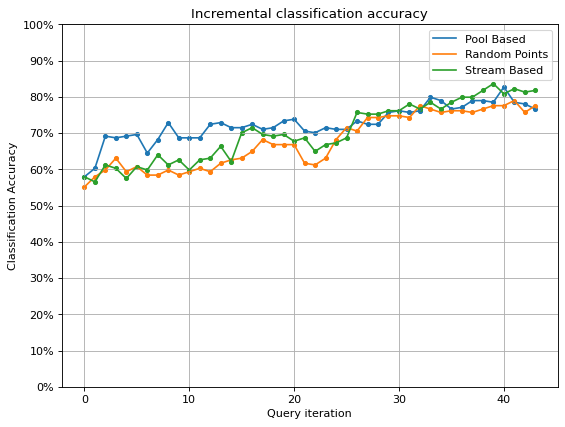

In [61]:
X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

rf = RandomForestClassifier()
learner_random = ActiveLearner(estimator=rf, 
                                        X_training=X_train, y_training=y_train, 
                                        query_strategy = classifier_margin)
unqueried_score = learner_random.score(X_full, y_full)
#print('Initial prediction accuracy using margin: %f' % unqueried_score)

X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_pool = np.delete(y_full, training_indices, axis=0)

values = learner_random.query(X_pool)
# values.sort()

performance_history_random_20 = [unqueried_score]
random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
dicti = {}
for i in range(N_QUERIES_20):
    random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
    X, y = X_pool[random].reshape(1,-1), y_pool[random].reshape(1,)
    learner_random.teach(X=X, y=y)
    model_accuracy = learner_random.score(X_full, y_full)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=random + 1, acc=model_accuracy))
    performance_history_random_20.append(model_accuracy)
    X_pool = np.delete(X_pool, random, axis = 0)
    y_pool = np.delete(y_pool, random)

X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
#y_full = y_full.apply(crop_to_numeric)
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices]

learner_stream = ActiveLearner(
    estimator=RandomForestClassifier(),
    X_training=X_train, y_training=y_train,
    query_strategy = margin_sampling
)
unqueried_score = learner_stream.score(X_full, y_full)
performance_history_stream_20 = [unqueried_score]

X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_stream = np.delete(y_full, training_indices, axis=0)

# stream_idx = np.random.choice(range(len(X_stream)))
# classifier_margin(learner_stream, X_stream[stream_idx].reshape(1, -1))
i = 0
while(1):
    stream_idx = np.random.choice(range(len(X_stream)))
    if classifier_margin(learner_stream, X_stream[stream_idx].reshape(1, -1)) <= 0.15:
        i = i+1
        learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
        new_score = learner_stream.score(X_full, y_full)
        performance_history_stream_20.append(new_score)
        X_stream = np.delete(X_stream, stream_idx, axis = 0)
        y_stream = np.delete(y_stream, stream_idx, axis = 0)
        print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))
        if i == N_QUERIES_20:
            break

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

ax.plot(performance_history_margin_20, label = "Pool Based")
ax.plot(performance_history_random_20, label = "Random Points")
ax.plot(performance_history_stream_20, label = "Stream Based")
ax.scatter(range(len(performance_history_margin_20)), performance_history_margin_20, s=13)
ax.scatter(range(len(performance_history_random_20)), performance_history_random_20, s=13)
ax.scatter(range(len(performance_history_stream_20)), performance_history_stream_20, s=13)
leg = ax.legend()
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/part4_test_20.png")

plt.show()

In [ ]:
# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

# rf = RandomForestClassifier()
# learner_random = ActiveLearner(estimator=rf, 
#                                         X_training=X_train, y_training=y_train, 
#                                         query_strategy = classifier_margin)
# unqueried_score = learner_random.score(X_full, y_full)
# #print('Initial prediction accuracy using margin: %f' % unqueried_score)

# X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_pool = np.delete(y_full, training_indices, axis=0)

# values = learner_random.query(X_pool)
# # values.sort()

# performance_history_random_20 = [unqueried_score]
# random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
# dicti = {}
# for i in range(N_QUERIES_20):
#     random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
#     X, y = X_pool[random].reshape(1,-1), y_pool[random].reshape(1,)
#     learner_random.teach(X=X, y=y)
#     model_accuracy = learner_random.score(X_full, y_full)
#     print('Accuracy after query {n}: {acc:0.4f}'.format(n=random + 1, acc=model_accuracy))
#     performance_history_random_20.append(model_accuracy)
#     X_pool = np.delete(X_pool, random, axis = 0)
#     y_pool = np.delete(y_pool, random)

# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# #y_full = y_full.apply(crop_to_numeric)
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices]

# learner_stream = ActiveLearner(
#     estimator=RandomForestClassifier(),
#     X_training=X_train, y_training=y_train,
#     query_strategy = margin_sampling
# )
# unqueried_score = learner_stream.score(X_full, y_full)
# performance_history_stream_20 = [unqueried_score]

# X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_stream = np.delete(y_full, training_indices, axis=0)

# # stream_idx = np.random.choice(range(len(X_stream)))
# # classifier_margin(learner_stream, X_stream[stream_idx].reshape(1, -1))
# i = 0
# while(1):
#     stream_idx = np.random.choice(range(len(X_stream)))
#     if classifier_margin(learner_stream, X_stream[stream_idx].reshape(1, -1)) <= 0.4:
#         i = i+1
#         learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
#         new_score = learner_stream.score(X_full, y_full)
#         performance_history_stream_20.append(new_score)
#         X_stream = np.delete(X_stream, stream_idx, axis = 0)
#         y_stream = np.delete(y_stream, stream_idx, axis = 0)
#         print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))
#         if i == N_QUERIES_20:
#             break

# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

# ax.plot(performance_history_margin_20, label = "Pool Based")
# ax.plot(performance_history_random_20, label = "Random Points")
# ax.plot(performance_history_stream_20, label = "Stream Based")
# ax.scatter(range(len(performance_history_margin_20)), performance_history_margin_20, s=13)
# ax.scatter(range(len(performance_history_random_20)), performance_history_random_20, s=13)
# ax.scatter(range(len(performance_history_stream_20)), performance_history_stream_20, s=13)
# leg = ax.legend()
# ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
# ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
# ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

# ax.set_ylim(bottom=0, top=1)
# ax.grid(True)

# ax.set_title('Incremental classification accuracy')
# ax.set_xlabel('Query iteration')
# ax.set_ylabel('Classification Accuracy')

# plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/part4_20.png")

# plt.show()

In [ ]:
# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

# rf = RandomForestClassifier()
# learner_random = ActiveLearner(estimator=rf, 
#                                         X_training=X_train, y_training=y_train, 
#                                         query_strategy = classifier_margin)
# unqueried_score = learner_random.score(X_full, y_full)
# #print('Initial prediction accuracy using margin: %f' % unqueried_score)

# X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_pool = np.delete(y_full, training_indices, axis=0)

# values = learner_random.query(X_pool)
# # values.sort()

# performance_history_random_20 = [unqueried_score]
# random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
# dicti = {}
# for i in range(N_QUERIES_20):
#     random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
#     X, y = X_pool[random].reshape(1,-1), y_pool[random].reshape(1,)
#     learner_random.teach(X=X, y=y)
#     model_accuracy = learner_random.score(X_full, y_full)
#     print('Accuracy after query {n}: {acc:0.4f}'.format(n=random + 1, acc=model_accuracy))
#     performance_history_random_20.append(model_accuracy)
#     X_pool = np.delete(X_pool, random, axis = 0)
#     y_pool = np.delete(y_pool, random)

# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# #y_full = y_full.apply(crop_to_numeric)
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices]

# learner_stream = ActiveLearner(
#     estimator=RandomForestClassifier(),
#     X_training=X_train, y_training=y_train,
#     query_strategy = margin_sampling
# )
# unqueried_score = learner_stream.score(X_full, y_full)
# performance_history_stream_20 = [unqueried_score]

# X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_stream = np.delete(y_full, training_indices, axis=0)


# for index in range(N_QUERIES_20):
#     stream_idx = np.random.choice(range(len(X_stream)))
#     if classifier_margin(learner_stream, X_stream[stream_idx].reshape(1, -1)) <= 0.4:
#         learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
#         new_score = learner_stream.score(X_full, y_full)
#         performance_history_stream_20.append(new_score)
#         X_stream = np.delete(X_stream, stream_idx, axis = 0)
#         y_stream = np.delete(y_stream, stream_idx, axis = 0)
#         print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))

# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

# ax.plot(performance_history_margin_20, label = "Pool Based")
# ax.plot(performance_history_random_20, label = "Random Points")
# ax.plot(performance_history_stream_20, label = "Stream Based")
# ax.scatter(range(len(performance_history_margin_20)), performance_history_margin_20, s=13)
# ax.scatter(range(len(performance_history_random_20)), performance_history_random_20, s=13)
# ax.scatter(range(len(performance_history_stream_20)), performance_history_stream_20, s=13)
# leg = ax.legend()
# ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
# ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
# ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

# ax.set_ylim(bottom=0, top=1)
# ax.grid(True)

# ax.set_title('Incremental classification accuracy')
# ax.set_xlabel('Query iteration')
# ax.set_ylabel('Classification Accuracy')

# plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/part4_20.png")

# plt.show()

In [ ]:
# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

# rf = RandomForestClassifier()
# learner_random = ActiveLearner(estimator=rf, 
#                                         X_training=X_train, y_training=y_train, 
#                                         query_strategy = classifier_margin)
# unqueried_score = learner_random.score(X_full, y_full)
# #print('Initial prediction accuracy using margin: %f' % unqueried_score)

# X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_pool = np.delete(y_full, training_indices, axis=0)

# values = learner_random.query(X_pool)
# # values.sort()

# performance_history_random_20 = [unqueried_score]
# random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
# dicti = {}
# for i in range(N_QUERIES_20):
#     random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
#     X, y = X_pool[random].reshape(1,-1), y_pool[random].reshape(1,)
#     learner_random.teach(X=X, y=y)
#     model_accuracy = learner_random.score(X_full, y_full)
#     print('Accuracy after query {n}: {acc:0.4f}'.format(n=random + 1, acc=model_accuracy))
#     performance_history_random_20.append(model_accuracy)
#     X_pool = np.delete(X_pool, random, axis = 0)
#     y_pool = np.delete(y_pool, random)

# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# #y_full = y_full.apply(crop_to_numeric)
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices]

# learner_stream = ActiveLearner(
#     estimator=RandomForestClassifier(),
#     X_training=X_train, y_training=y_train,
#     query_strategy = margin_sampling
# )
# unqueried_score = learner_stream.score(X_full, y_full)
# performance_history_stream_20 = [unqueried_score]

# X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_stream = np.delete(y_full, training_indices, axis=0)


# for index in range(N_QUERIES_20):
#     stream_idx = np.random.choice(range(len(X_stream)))
#     if classifier_uncertainty(learner_stream, X_stream[stream_idx].reshape(1, -1)) >= 0.4:
#         learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
#         new_score = learner_stream.score(X_full, y_full)
#         performance_history_stream_20.append(new_score)
#         X_stream = np.delete(X_stream, stream_idx, axis = 0)
#         y_stream = np.delete(y_stream, stream_idx, axis = 0)
#         print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))

# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

# ax.plot(performance_history_margin_20, label = "Pool Based")
# ax.plot(performance_history_random_20, label = "Random Points")
# ax.plot(performance_history_stream_20, label = "Stream Based")
# ax.scatter(range(len(performance_history_margin_20)), performance_history_margin_20, s=13)
# ax.scatter(range(len(performance_history_random_20)), performance_history_random_20, s=13)
# ax.scatter(range(len(performance_history_stream_20)), performance_history_stream_20, s=13)
# leg = ax.legend()
# ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
# ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
# ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

# ax.set_ylim(bottom=0, top=1)
# ax.grid(True)

# ax.set_title('Incremental classification accuracy')
# ax.set_xlabel('Query iteration')
# ax.set_ylabel('Classification Accuracy')

# plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/part4_20.png")

# plt.show()

# 30% Additional Labels

Accuracy after query [137]: 0.5701
Accuracy after query [114]: 0.5748
Accuracy after query [3]: 0.5327
Accuracy after query [175]: 0.5654
Accuracy after query [68]: 0.5841
Accuracy after query [107]: 0.5701
Accuracy after query [116]: 0.5701
Accuracy after query [88]: 0.5794
Accuracy after query [181]: 0.5748
Accuracy after query [1]: 0.5794
Accuracy after query [63]: 0.5935
Accuracy after query [182]: 0.5748
Accuracy after query [109]: 0.5561
Accuracy after query [47]: 0.5981
Accuracy after query [15]: 0.6028
Accuracy after query [174]: 0.5841
Accuracy after query [159]: 0.5841
Accuracy after query [163]: 0.5935
Accuracy after query [93]: 0.5981
Accuracy after query [45]: 0.6121
Accuracy after query [25]: 0.5935
Accuracy after query [59]: 0.6215
Accuracy after query [116]: 0.6308
Accuracy after query [68]: 0.6308
Accuracy after query [149]: 0.6449
Accuracy after query [32]: 0.6402
Accuracy after query [140]: 0.6589
Accuracy after query [165]: 0.6542
Accuracy after query [26]: 0.6963
A

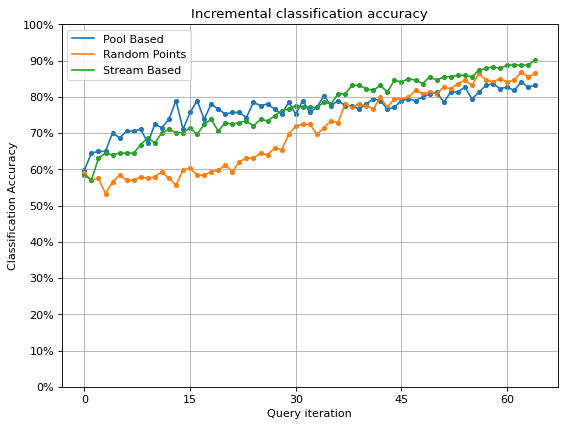

In [62]:
X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

rf = RandomForestClassifier()
learner_random = ActiveLearner(estimator=rf, 
                                        X_training=X_train, y_training=y_train, 
                                        query_strategy = classifier_margin)
unqueried_score = learner_random.score(X_full, y_full)
#print('Initial prediction accuracy using margin: %f' % unqueried_score)

X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_pool = np.delete(y_full, training_indices, axis=0)

values = learner_random.query(X_pool)
# values.sort()

performance_history_random_30 = [unqueried_score]
random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
dicti = {}
for i in range(N_QUERIES_30):
    random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
    X, y = X_pool[random].reshape(1,-1), y_pool[random].reshape(1,)
    learner_random.teach(X=X, y=y)
    model_accuracy = learner_random.score(X_full, y_full)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=random + 1, acc=model_accuracy))
    performance_history_random_30.append(model_accuracy)
    X_pool = np.delete(X_pool, random, axis = 0)
    y_pool = np.delete(y_pool, random)

X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
#y_full = y_full.apply(crop_to_numeric)
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices]

learner_stream = ActiveLearner(
    estimator=RandomForestClassifier(),
    X_training=X_train, y_training=y_train,
    query_strategy = margin_sampling
)
unqueried_score = learner_stream.score(X_full, y_full)
performance_history_stream_30 = [unqueried_score]

X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_stream = np.delete(y_full, training_indices, axis=0)

i = 0
while(1):
    stream_idx = np.random.choice(range(len(X_stream)))
    if classifier_margin(learner_stream, X_stream[stream_idx].reshape(1, -1)) <= 0.18:
        i = i+1
        learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
        new_score = learner_stream.score(X_full, y_full)
        performance_history_stream_30.append(new_score)
        X_stream = np.delete(X_stream, stream_idx, axis = 0)
        y_stream = np.delete(y_stream, stream_idx, axis = 0)
        print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))
        if i == N_QUERIES_30:
            break

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

ax.plot(performance_history_margin_30, label = "Pool Based")
ax.plot(performance_history_random_30, label = "Random Points")
ax.plot(performance_history_stream_30, label = "Stream Based")
ax.scatter(range(len(performance_history_margin_30)), performance_history_margin_30, s=13)
ax.scatter(range(len(performance_history_random_30)), performance_history_random_30, s=13)
ax.scatter(range(len(performance_history_stream_30)), performance_history_stream_30, s=13)
leg = ax.legend()
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/part4_test_30.png")

plt.show()

In [ ]:
# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

# rf = RandomForestClassifier()
# learner_random = ActiveLearner(estimator=rf, 
#                                         X_training=X_train, y_training=y_train, 
#                                         query_strategy = classifier_margin)
# unqueried_score = learner_random.score(X_full, y_full)
# #print('Initial prediction accuracy using margin: %f' % unqueried_score)

# X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_pool = np.delete(y_full, training_indices, axis=0)

# values = learner_random.query(X_pool)
# # values.sort()

# performance_history_random_30 = [unqueried_score]
# random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
# dicti = {}
# for i in range(N_QUERIES_30):
#     random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
#     X, y = X_pool[random].reshape(1,-1), y_pool[random].reshape(1,)
#     learner_random.teach(X=X, y=y)
#     model_accuracy = learner_random.score(X_full, y_full)
#     print('Accuracy after query {n}: {acc:0.4f}'.format(n=random + 1, acc=model_accuracy))
#     performance_history_random_30.append(model_accuracy)
#     X_pool = np.delete(X_pool, random, axis = 0)
#     y_pool = np.delete(y_pool, random)

# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# #y_full = y_full.apply(crop_to_numeric)
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices]

# learner_stream = ActiveLearner(
#     estimator=RandomForestClassifier(),
#     X_training=X_train, y_training=y_train,
#     query_strategy = margin_sampling
# )
# unqueried_score = learner_stream.score(X_full, y_full)
# performance_history_stream_30 = [unqueried_score]

# X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_stream = np.delete(y_full, training_indices, axis=0)

# i = 0
# while(1):
#     stream_idx = np.random.choice(range(len(X_stream)))
#     if classifier_margin(learner_stream, X_stream[stream_idx].reshape(1, -1)) <= 0.4:
#         i = i+1
#         learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
#         new_score = learner_stream.score(X_full, y_full)
#         performance_history_stream_30.append(new_score)
#         X_stream = np.delete(X_stream, stream_idx, axis = 0)
#         y_stream = np.delete(y_stream, stream_idx, axis = 0)
#         print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))
#         if i == N_QUERIES_30:
#             break

# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

# ax.plot(performance_history_margin_30, label = "Pool Based")
# ax.plot(performance_history_random_30, label = "Random Points")
# ax.plot(performance_history_stream_30, label = "Stream Based")
# ax.scatter(range(len(performance_history_margin_30)), performance_history_margin_30, s=13)
# ax.scatter(range(len(performance_history_random_30)), performance_history_random_30, s=13)
# ax.scatter(range(len(performance_history_stream_30)), performance_history_stream_30, s=13)
# leg = ax.legend()
# ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
# ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
# ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

# ax.set_ylim(bottom=0, top=1)
# ax.grid(True)

# ax.set_title('Incremental classification accuracy')
# ax.set_xlabel('Query iteration')
# ax.set_ylabel('Classification Accuracy')

# plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/part4_30.png")

# plt.show()

In [ ]:
# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

# rf = RandomForestClassifier()
# learner_random = ActiveLearner(estimator=rf, 
#                                         X_training=X_train, y_training=y_train, 
#                                         query_strategy = classifier_margin)
# unqueried_score = learner_random.score(X_full, y_full)
# #print('Initial prediction accuracy using margin: %f' % unqueried_score)

# X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_pool = np.delete(y_full, training_indices, axis=0)

# values = learner_random.query(X_pool)
# # values.sort()

# performance_history_random_30 = [unqueried_score]
# random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
# dicti = {}
# for i in range(N_QUERIES_30):
#     random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
#     X, y = X_pool[random].reshape(1,-1), y_pool[random].reshape(1,)
#     learner_random.teach(X=X, y=y)
#     model_accuracy = learner_random.score(X_full, y_full)
#     print('Accuracy after query {n}: {acc:0.4f}'.format(n=random + 1, acc=model_accuracy))
#     performance_history_random_30.append(model_accuracy)
#     X_pool = np.delete(X_pool, random, axis = 0)
#     y_pool = np.delete(y_pool, random)

# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# #y_full = y_full.apply(crop_to_numeric)
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices]

# learner_stream = ActiveLearner(
#     estimator=RandomForestClassifier(),
#     X_training=X_train, y_training=y_train,
#     query_strategy = margin_sampling
# )
# unqueried_score = learner_stream.score(X_full, y_full)
# performance_history_stream_30 = [unqueried_score]

# X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_stream = np.delete(y_full, training_indices, axis=0)


# for index in range(N_QUERIES_30):
#     stream_idx = np.random.choice(range(len(X_stream)))
#     if classifier_uncertainty(learner_stream, X_stream[stream_idx].reshape(1, -1)) >= 0.4:
#         learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
#         new_score = learner_stream.score(X_full, y_full)
#         performance_history_stream_30.append(new_score)
#         X_stream = np.delete(X_stream, stream_idx, axis = 0)
#         y_stream = np.delete(y_stream, stream_idx, axis = 0)
#         print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))

# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

# ax.plot(performance_history_margin_30, label = "Pool Based")
# ax.plot(performance_history_random_30, label = "Random Points")
# ax.plot(performance_history_stream_30, label = "Stream Based")
# ax.scatter(range(len(performance_history_margin_30)), performance_history_margin_30, s=13)
# ax.scatter(range(len(performance_history_random_30)), performance_history_random_30, s=13)
# ax.scatter(range(len(performance_history_stream_30)), performance_history_stream_30, s=13)
# leg = ax.legend()
# ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
# ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
# ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

# ax.set_ylim(bottom=0, top=1)
# ax.grid(True)

# ax.set_title('Incremental classification accuracy')
# ax.set_xlabel('Query iteration')
# ax.set_ylabel('Classification Accuracy')

# plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/part4_30.png")

# plt.show()

In [ ]:
# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

# rf = RandomForestClassifier()
# learner_random = ActiveLearner(estimator=rf, 
#                                         X_training=X_train, y_training=y_train, 
#                                         query_strategy = classifier_margin)
# unqueried_score = learner_random.score(X_full, y_full)
# #print('Initial prediction accuracy using margin: %f' % unqueried_score)

# X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_pool = np.delete(y_full, training_indices, axis=0)

# values = learner_random.query(X_pool)
# # values.sort()

# performance_history_random_30 = [unqueried_score]
# random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
# dicti = {}
# for i in range(N_QUERIES_30):
#     random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
#     X, y = X_pool[random].reshape(1,-1), y_pool[random].reshape(1,)
#     learner_random.teach(X=X, y=y)
#     model_accuracy = learner_random.score(X_full, y_full)
#     print('Accuracy after query {n}: {acc:0.4f}'.format(n=random + 1, acc=model_accuracy))
#     performance_history_random_30.append(model_accuracy)
#     X_pool = np.delete(X_pool, random, axis = 0)
#     y_pool = np.delete(y_pool, random)

# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# #y_full = y_full.apply(crop_to_numeric)
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices]

# learner_stream = ActiveLearner(
#     estimator=RandomForestClassifier(),
#     X_training=X_train, y_training=y_train,
#     query_strategy = margin_sampling
# )
# unqueried_score = learner_stream.score(X_full, y_full)
# performance_history_stream_30 = [unqueried_score]

# X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_stream = np.delete(y_full, training_indices, axis=0)


# for index in range(N_QUERIES_30):
#     stream_idx = np.random.choice(range(len(X_stream)))
#     if classifier_uncertainty(learner_stream, X_stream[stream_idx].reshape(1, -1)) >= 0.4:
#         learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
#         new_score = learner_stream.score(X_full, y_full)
#         performance_history_stream_30.append(new_score)
#         X_stream = np.delete(X_stream, stream_idx, axis = 0)
#         y_stream = np.delete(y_stream, stream_idx, axis = 0)
#         print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))

# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

# ax.plot(performance_history_margin_30, label = "Pool Based")
# ax.plot(performance_history_random_30, label = "Random Points")
# ax.plot(performance_history_stream_30, label = "Stream Based")
# ax.scatter(range(len(performance_history_margin_30)), performance_history_margin_30, s=13)
# ax.scatter(range(len(performance_history_random_30)), performance_history_random_30, s=13)
# ax.scatter(range(len(performance_history_stream_30)), performance_history_stream_30, s=13)
# leg = ax.legend()
# ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
# ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
# ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

# ax.set_ylim(bottom=0, top=1)
# ax.grid(True)

# ax.set_title('Incremental classification accuracy')
# ax.set_xlabel('Query iteration')
# ax.set_ylabel('Classification Accuracy')

# plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/part4_30.png")

# plt.show()

# 40% Additional Labels

Accuracy after query [164]: 0.5794
Accuracy after query [46]: 0.5748
Accuracy after query [89]: 0.5654
Accuracy after query [135]: 0.5794
Accuracy after query [25]: 0.6075
Accuracy after query [104]: 0.6215
Accuracy after query [77]: 0.6215
Accuracy after query [5]: 0.5981
Accuracy after query [110]: 0.6449
Accuracy after query [173]: 0.6262
Accuracy after query [110]: 0.6729
Accuracy after query [104]: 0.6682
Accuracy after query [78]: 0.6308
Accuracy after query [172]: 0.6355
Accuracy after query [47]: 0.6682
Accuracy after query [57]: 0.6636
Accuracy after query [16]: 0.6729
Accuracy after query [155]: 0.6729
Accuracy after query [29]: 0.6729
Accuracy after query [153]: 0.6822
Accuracy after query [140]: 0.7009
Accuracy after query [132]: 0.7290
Accuracy after query [66]: 0.7383
Accuracy after query [146]: 0.7243
Accuracy after query [153]: 0.6963
Accuracy after query [27]: 0.7336
Accuracy after query [143]: 0.7570
Accuracy after query [22]: 0.7383
Accuracy after query [7]: 0.7290
A

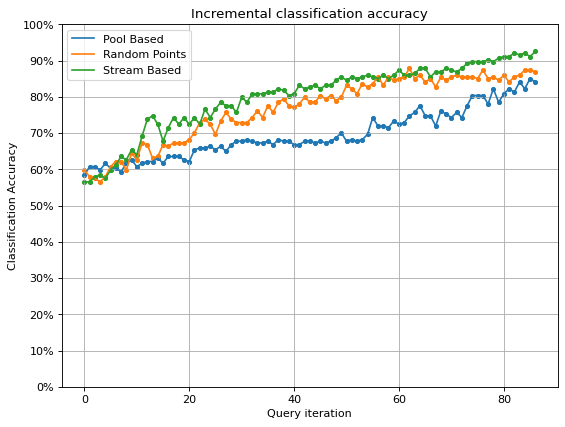

In [63]:
X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

rf = RandomForestClassifier()
learner_random = ActiveLearner(estimator=rf, 
                                        X_training=X_train, y_training=y_train, 
                                        query_strategy = classifier_uncertainty)
unqueried_score = learner_random.score(X_full, y_full)
#print('Initial prediction accuracy using margin: %f' % unqueried_score)

X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_pool = np.delete(y_full, training_indices, axis=0)

values = learner_random.query(X_pool)
# values.sort()

performance_history_random_40 = [unqueried_score]
random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
dicti = {}
for i in range(N_QUERIES_40):
    random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
    X, y = X_pool[random].reshape(1,-1), y_pool[random].reshape(1,)
    learner_random.teach(X=X, y=y)
    model_accuracy = learner_random.score(X_full, y_full)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=random + 1, acc=model_accuracy))
    performance_history_random_40.append(model_accuracy)
    X_pool = np.delete(X_pool, random, axis = 0)
    y_pool = np.delete(y_pool, random)

X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
#y_full = y_full.apply(crop_to_numeric)
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices]

learner_stream = ActiveLearner(
    estimator=RandomForestClassifier(),
    X_training=X_train, y_training=y_train,
    query_strategy = uncertainty_sampling
)
unqueried_score = learner_stream.score(X_full, y_full)
performance_history_stream_40 = [unqueried_score]

X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_stream = np.delete(y_full, training_indices, axis=0)


i = 0
while(1):
    stream_idx = np.random.choice(range(len(X_stream)))
    if classifier_uncertainty(learner_stream, X_stream[stream_idx].reshape(1, -1)) >= 0.36:
        i = i+1
        learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
        new_score = learner_stream.score(X_full, y_full)
        performance_history_stream_40.append(new_score)
        X_stream = np.delete(X_stream, stream_idx, axis = 0)
        y_stream = np.delete(y_stream, stream_idx, axis = 0)
        print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))
        if i == N_QUERIES_40:
            break

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

ax.plot(performance_history_least_confident_40, label = "Pool Based")
ax.plot(performance_history_random_40, label = "Random Points")
ax.plot(performance_history_stream_40, label = "Stream Based")
ax.scatter(range(len(performance_history_least_confident_40)), performance_history_least_confident_40, s=13)
ax.scatter(range(len(performance_history_random_40)), performance_history_random_40, s=13)
ax.scatter(range(len(performance_history_stream_40)), performance_history_stream_40, s=13)
leg = ax.legend()
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/part4_test_40.png")

plt.show()

In [ ]:
# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

# rf = RandomForestClassifier()
# learner_random = ActiveLearner(estimator=rf, 
#                                         X_training=X_train, y_training=y_train, 
#                                         query_strategy = classifier_uncertainty)
# unqueried_score = learner_random.score(X_full, y_full)
# #print('Initial prediction accuracy using margin: %f' % unqueried_score)

# X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_pool = np.delete(y_full, training_indices, axis=0)

# values = learner_random.query(X_pool)
# # values.sort()

# performance_history_random_40 = [unqueried_score]
# random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
# dicti = {}
# for i in range(N_QUERIES_40):
#     random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
#     X, y = X_pool[random].reshape(1,-1), y_pool[random].reshape(1,)
#     learner_random.teach(X=X, y=y)
#     model_accuracy = learner_random.score(X_full, y_full)
#     print('Accuracy after query {n}: {acc:0.4f}'.format(n=random + 1, acc=model_accuracy))
#     performance_history_random_40.append(model_accuracy)
#     X_pool = np.delete(X_pool, random, axis = 0)
#     y_pool = np.delete(y_pool, random)

# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# #y_full = y_full.apply(crop_to_numeric)
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices]

# learner_stream = ActiveLearner(
#     estimator=RandomForestClassifier(),
#     X_training=X_train, y_training=y_train,
#     query_strategy = uncertainty_sampling
# )
# unqueried_score = learner_stream.score(X_full, y_full)
# performance_history_stream_40 = [unqueried_score]

# X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_stream = np.delete(y_full, training_indices, axis=0)


# i = 0
# while(1):
#     stream_idx = np.random.choice(range(len(X_stream)))
#     if classifier_margin(learner_stream, X_stream[stream_idx].reshape(1, -1)) <= 0.4:
#         i = i+1
#         learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
#         new_score = learner_stream.score(X_full, y_full)
#         performance_history_stream_40.append(new_score)
#         X_stream = np.delete(X_stream, stream_idx, axis = 0)
#         y_stream = np.delete(y_stream, stream_idx, axis = 0)
#         print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))
#         if i == N_QUERIES_40:
#             break

# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

# ax.plot(performance_history_least_confident_40, label = "Pool Based")
# ax.plot(performance_history_random_40, label = "Random Points")
# ax.plot(performance_history_stream_40, label = "Stream Based")
# ax.scatter(range(len(performance_history_least_confident_40)), performance_history_least_confident_40, s=13)
# ax.scatter(range(len(performance_history_random_40)), performance_history_random_40, s=13)
# ax.scatter(range(len(performance_history_stream_40)), performance_history_stream_40, s=13)
# leg = ax.legend()
# ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
# ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
# ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

# ax.set_ylim(bottom=0, top=1)
# ax.grid(True)

# ax.set_title('Incremental classification accuracy')
# ax.set_xlabel('Query iteration')
# ax.set_ylabel('Classification Accuracy')

# plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/part4_40.png")

# plt.show()

In [ ]:
# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

# rf = RandomForestClassifier()
# learner_random = ActiveLearner(estimator=rf, 
#                                         X_training=X_train, y_training=y_train, 
#                                         query_strategy = classifier_uncertainty)
# unqueried_score = learner_random.score(X_full, y_full)
# #print('Initial prediction accuracy using margin: %f' % unqueried_score)

# X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_pool = np.delete(y_full, training_indices, axis=0)

# values = learner_random.query(X_pool)
# # values.sort()

# performance_history_random_40 = [unqueried_score]
# random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
# dicti = {}
# for i in range(N_QUERIES_40):
#     random = np.random.randint(low=0, high=X_pool.shape[0], size=1)
#     X, y = X_pool[random].reshape(1,-1), y_pool[random].reshape(1,)
#     learner_random.teach(X=X, y=y)
#     model_accuracy = learner_random.score(X_full, y_full)
#     print('Accuracy after query {n}: {acc:0.4f}'.format(n=random + 1, acc=model_accuracy))
#     performance_history_random_40.append(model_accuracy)
#     X_pool = np.delete(X_pool, random, axis = 0)
#     y_pool = np.delete(y_pool, random)

# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# #y_full = y_full.apply(crop_to_numeric)
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices]

# learner_stream = ActiveLearner(
#     estimator=RandomForestClassifier(),
#     X_training=X_train, y_training=y_train,
#     query_strategy = uncertainty_sampling
# )
# unqueried_score = learner_stream.score(X_full, y_full)
# performance_history_stream_40 = [unqueried_score]

# X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_stream = np.delete(y_full, training_indices, axis=0)


# for index in range(N_QUERIES_40):
#     stream_idx = np.random.choice(range(len(X_stream)))
#     if classifier_uncertainty(learner_stream, X_stream[stream_idx].reshape(1, -1)) >= 0.4:
#         learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
#         new_score = learner_stream.score(X_full, y_full)
#         performance_history_stream_40.append(new_score)
#         X_stream = np.delete(X_stream, stream_idx, axis = 0)
#         y_stream = np.delete(y_stream, stream_idx, axis = 0)
#         print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))

# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

# ax.plot(performance_history_least_confident_40, label = "Pool Based")
# ax.plot(performance_history_random_40, label = "Random Points")
# ax.plot(performance_history_stream_40, label = "Stream Based")
# ax.scatter(range(len(performance_history_least_confident_40)), performance_history_least_confident_40, s=13)
# ax.scatter(range(len(performance_history_random_40)), performance_history_random_40, s=13)
# ax.scatter(range(len(performance_history_stream_40)), performance_history_stream_40, s=13)
# leg = ax.legend()
# ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
# ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
# ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

# ax.set_ylim(bottom=0, top=1)
# ax.grid(True)

# ax.set_title('Incremental classification accuracy')
# ax.set_xlabel('Query iteration')
# ax.set_ylabel('Classification Accuracy')

# plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/part4_40.png")

# plt.show()

# Stream Based

Row no. 145 queried, new accuracy: 0.593458
Row no. 78 queried, new accuracy: 0.579439
Row no. 165 queried, new accuracy: 0.579439
Row no. 153 queried, new accuracy: 0.626168
Row no. 113 queried, new accuracy: 0.616822
Row no. 177 queried, new accuracy: 0.630841
Row no. 167 queried, new accuracy: 0.621495
Row no. 89 queried, new accuracy: 0.616822
Row no. 156 queried, new accuracy: 0.626168
Row no. 35 queried, new accuracy: 0.626168
Row no. 52 queried, new accuracy: 0.649533
Row no. 12 queried, new accuracy: 0.682243
Row no. 160 queried, new accuracy: 0.644860
Row no. 145 queried, new accuracy: 0.672897
Row no. 89 queried, new accuracy: 0.682243
Row no. 150 queried, new accuracy: 0.672897
Row no. 137 queried, new accuracy: 0.649533
Row no. 30 queried, new accuracy: 0.719626
Row no. 150 queried, new accuracy: 0.714953
Row no. 154 queried, new accuracy: 0.742991
Row no. 88 queried, new accuracy: 0.719626
Second
Row no. 153 queried, new accuracy: 0.579439
Row no. 83 queried, new accuracy:

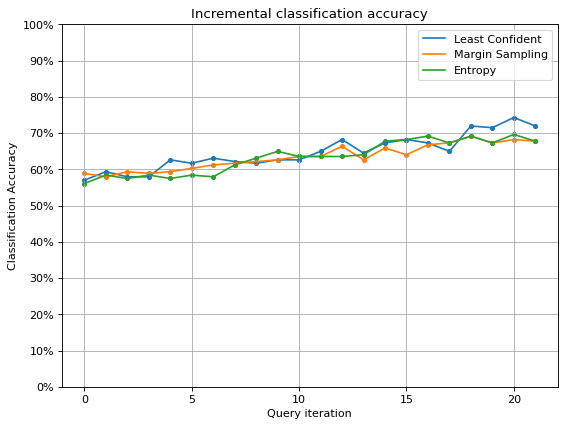

In [71]:
# 10% Additional
X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
#y_full = y_full.apply(crop_to_numeric)
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices]

learner_stream = ActiveLearner(
    estimator=RandomForestClassifier(),
    X_training=X_train, y_training=y_train,
    query_strategy = uncertainty_sampling
)
unqueried_score = learner_stream.score(X_full, y_full)
performance_history_stream_lc_10 = [unqueried_score]

X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_stream = np.delete(y_full, training_indices, axis=0)

i = 0
while(1):
    stream_idx = np.random.choice(range(len(X_stream)))
    if classifier_uncertainty(learner_stream, X_stream[stream_idx].reshape(1, -1)) >= 0.5:
        i = i+1
        learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
        new_score = learner_stream.score(X_full, y_full)
        performance_history_stream_lc_10.append(new_score)
        X_stream = np.delete(X_stream, stream_idx, axis = 0)
        y_stream = np.delete(y_stream, stream_idx, axis = 0)
        print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))
        if i == N_QUERIES_10:
            break
print("Second")
# 10% Additional
X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
#y_full = y_full.apply(crop_to_numeric)
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices]

learner_stream = ActiveLearner(
    estimator=RandomForestClassifier(),
    X_training=X_train, y_training=y_train,
    query_strategy = margin_sampling
)
unqueried_score = learner_stream.score(X_full, y_full)
performance_history_stream_margin_10 = [unqueried_score]

X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_stream = np.delete(y_full, training_indices, axis=0)

i = 0
while(1):
    stream_idx = np.random.choice(range(len(X_stream)))
    if classifier_margin(learner_stream, X_stream[stream_idx].reshape(1, -1)) <= 0.1:
        i = i+1
        learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
        new_score = learner_stream.score(X_full, y_full)
        performance_history_stream_margin_10.append(new_score)
        X_stream = np.delete(X_stream, stream_idx, axis = 0)
        y_stream = np.delete(y_stream, stream_idx, axis = 0)
        print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))
        if i == N_QUERIES_10:
            break

# 10% Additional
X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
#y_full = y_full.apply(crop_to_numeric)
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices]

learner_stream = ActiveLearner(
    estimator=RandomForestClassifier(),
    X_training=X_train, y_training=y_train,
    query_strategy = entropy_sampling
)
unqueried_score = learner_stream.score(X_full, y_full)
performance_history_stream_entropy_10 = [unqueried_score]

X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_stream = np.delete(y_full, training_indices, axis=0)

print("Third")
i = 0
while(1):
    stream_idx = np.random.choice(range(len(X_stream)))
    if classifier_entropy(learner_stream, X_stream[stream_idx].reshape(1, -1)) >= 1:
        i = i+1
        learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
        new_score = learner_stream.score(X_full, y_full)
        performance_history_stream_entropy_10.append(new_score)
        X_stream = np.delete(X_stream, stream_idx, axis = 0)
        y_stream = np.delete(y_stream, stream_idx, axis = 0)
        print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))
        if i == N_QUERIES_10:
            break


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

ax.plot(performance_history_stream_lc_10, label = "Least Confident")
ax.plot(performance_history_stream_margin_10, label = "Margin Sampling")
ax.plot(performance_history_stream_entropy_10, label = "Entropy")
ax.scatter(range(len(performance_history_stream_lc_10)), performance_history_stream_lc_10, s=13)
ax.scatter(range(len(performance_history_stream_margin_10)), performance_history_stream_margin_10, s=13)
ax.scatter(range(len(performance_history_stream_entropy_10)), performance_history_stream_entropy_10, s=13)
leg = ax.legend()
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/streambased_10.png")

plt.show()       

Row no. 153 queried, new accuracy: 0.565421
Row no. 7 queried, new accuracy: 0.621495
Row no. 134 queried, new accuracy: 0.584112
Row no. 155 queried, new accuracy: 0.588785
Row no. 117 queried, new accuracy: 0.588785
Row no. 22 queried, new accuracy: 0.649533
Row no. 28 queried, new accuracy: 0.682243
Row no. 26 queried, new accuracy: 0.677570
Row no. 92 queried, new accuracy: 0.696262
Row no. 2 queried, new accuracy: 0.644860
Row no. 64 queried, new accuracy: 0.738318
Row no. 108 queried, new accuracy: 0.738318
Row no. 144 queried, new accuracy: 0.738318
Row no. 37 queried, new accuracy: 0.728972
Row no. 114 queried, new accuracy: 0.738318
Row no. 70 queried, new accuracy: 0.747664
Row no. 6 queried, new accuracy: 0.757009
Row no. 173 queried, new accuracy: 0.747664
Row no. 20 queried, new accuracy: 0.752336
Row no. 130 queried, new accuracy: 0.766355
Row no. 120 queried, new accuracy: 0.775701
Row no. 138 queried, new accuracy: 0.771028
Row no. 138 queried, new accuracy: 0.803738
Ro

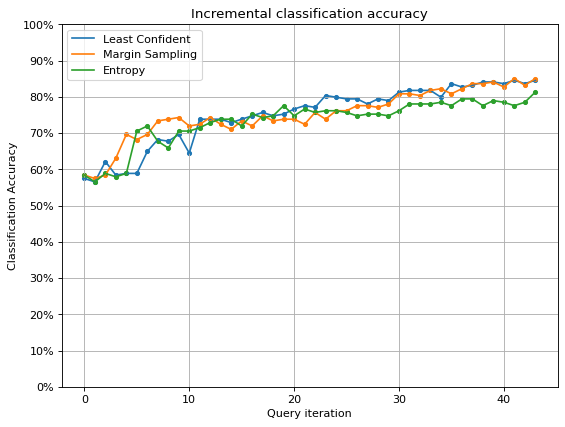

In [73]:
# 20% Additional
X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
#y_full = y_full.apply(crop_to_numeric)
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices]

learner_stream = ActiveLearner(
    estimator=RandomForestClassifier(),
    X_training=X_train, y_training=y_train,
    query_strategy = uncertainty_sampling
)
unqueried_score = learner_stream.score(X_full, y_full)
performance_history_stream_lc_20 = [unqueried_score]

X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_stream = np.delete(y_full, training_indices, axis=0)

i = 0
while(1):
    stream_idx = np.random.choice(range(len(X_stream)))
    if classifier_uncertainty(learner_stream, X_stream[stream_idx].reshape(1, -1)) >= 0.4:
        i = i+1
        learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
        new_score = learner_stream.score(X_full, y_full)
        performance_history_stream_lc_20.append(new_score)
        X_stream = np.delete(X_stream, stream_idx, axis = 0)
        y_stream = np.delete(y_stream, stream_idx, axis = 0)
        print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))
        if i == N_QUERIES_20:
            break
print("Second")
# 10% Additional
X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
#y_full = y_full.apply(crop_to_numeric)
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices]

learner_stream = ActiveLearner(
    estimator=RandomForestClassifier(),
    X_training=X_train, y_training=y_train,
    query_strategy = margin_sampling
)
unqueried_score = learner_stream.score(X_full, y_full)
performance_history_stream_margin_20 = [unqueried_score]

X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_stream = np.delete(y_full, training_indices, axis=0)

i = 0
while(1):
    stream_idx = np.random.choice(range(len(X_stream)))
    if classifier_margin(learner_stream, X_stream[stream_idx].reshape(1, -1)) <= 0.2:
        i = i+1
        learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
        new_score = learner_stream.score(X_full, y_full)
        performance_history_stream_margin_20.append(new_score)
        X_stream = np.delete(X_stream, stream_idx, axis = 0)
        y_stream = np.delete(y_stream, stream_idx, axis = 0)
        print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))
        if i == N_QUERIES_20:
            break

# 10% Additional
X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
#y_full = y_full.apply(crop_to_numeric)
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices]

learner_stream = ActiveLearner(
    estimator=RandomForestClassifier(),
    X_training=X_train, y_training=y_train,
    query_strategy = entropy_sampling
)
unqueried_score = learner_stream.score(X_full, y_full)
performance_history_stream_entropy_20 = [unqueried_score]

X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_stream = np.delete(y_full, training_indices, axis=0)

print("Third")
i = 0
while(1):
    stream_idx = np.random.choice(range(len(X_stream)))
    if classifier_entropy(learner_stream, X_stream[stream_idx].reshape(1, -1)) >= 0.7:
        i = i+1
        learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
        new_score = learner_stream.score(X_full, y_full)
        performance_history_stream_entropy_20.append(new_score)
        X_stream = np.delete(X_stream, stream_idx, axis = 0)
        y_stream = np.delete(y_stream, stream_idx, axis = 0)
        print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))
        if i == N_QUERIES_20:
            break


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

ax.plot(performance_history_stream_lc_20, label = "Least Confident")
ax.plot(performance_history_stream_margin_20, label = "Margin Sampling")
ax.plot(performance_history_stream_entropy_20, label = "Entropy")
ax.scatter(range(len(performance_history_stream_lc_20)), performance_history_stream_lc_20, s=13)
ax.scatter(range(len(performance_history_stream_margin_20)), performance_history_stream_margin_20, s=13)
ax.scatter(range(len(performance_history_stream_entropy_20)), performance_history_stream_entropy_20, s=13)
leg = ax.legend()
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/streambased_20.png")

plt.show()       

Row no. 78 queried, new accuracy: 0.579439
Row no. 175 queried, new accuracy: 0.574766
Row no. 38 queried, new accuracy: 0.602804
Row no. 41 queried, new accuracy: 0.654206
Row no. 158 queried, new accuracy: 0.649533
Row no. 128 queried, new accuracy: 0.635514
Row no. 47 queried, new accuracy: 0.640187
Row no. 104 queried, new accuracy: 0.640187
Row no. 11 queried, new accuracy: 0.663551
Row no. 174 queried, new accuracy: 0.654206
Row no. 25 queried, new accuracy: 0.686916
Row no. 51 queried, new accuracy: 0.682243
Row no. 48 queried, new accuracy: 0.696262
Row no. 8 queried, new accuracy: 0.672897
Row no. 76 queried, new accuracy: 0.705607
Row no. 111 queried, new accuracy: 0.747664
Row no. 116 queried, new accuracy: 0.724299
Row no. 161 queried, new accuracy: 0.719626
Row no. 85 queried, new accuracy: 0.733645
Row no. 114 queried, new accuracy: 0.757009
Row no. 131 queried, new accuracy: 0.747664
Row no. 79 queried, new accuracy: 0.757009
Row no. 87 queried, new accuracy: 0.738318
Ro

Row no. 95 queried, new accuracy: 0.822430
Row no. 115 queried, new accuracy: 0.836449


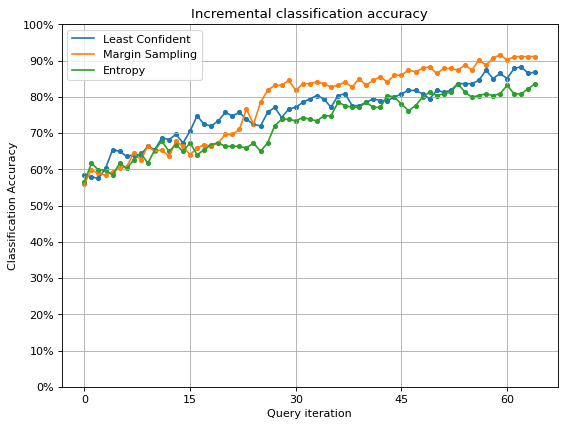

In [74]:
# 30% Additional
X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
#y_full = y_full.apply(crop_to_numeric)
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices]

learner_stream = ActiveLearner(
    estimator=RandomForestClassifier(),
    X_training=X_train, y_training=y_train,
    query_strategy = uncertainty_sampling
)
unqueried_score = learner_stream.score(X_full, y_full)
performance_history_stream_lc_30 = [unqueried_score]

X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_stream = np.delete(y_full, training_indices, axis=0)

i = 0
while(1):
    stream_idx = np.random.choice(range(len(X_stream)))
    if classifier_uncertainty(learner_stream, X_stream[stream_idx].reshape(1, -1)) >= 0.2:
        i = i+1
        learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
        new_score = learner_stream.score(X_full, y_full)
        performance_history_stream_lc_30.append(new_score)
        X_stream = np.delete(X_stream, stream_idx, axis = 0)
        y_stream = np.delete(y_stream, stream_idx, axis = 0)
        print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))
        if i == N_QUERIES_30:
            break
print("Second")
# 10% Additional
X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
#y_full = y_full.apply(crop_to_numeric)
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices]

learner_stream = ActiveLearner(
    estimator=RandomForestClassifier(),
    X_training=X_train, y_training=y_train,
    query_strategy = margin_sampling
)
unqueried_score = learner_stream.score(X_full, y_full)
performance_history_stream_margin_30 = [unqueried_score]

X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_stream = np.delete(y_full, training_indices, axis=0)

i = 0
while(1):
    stream_idx = np.random.choice(range(len(X_stream)))
    if classifier_margin(learner_stream, X_stream[stream_idx].reshape(1, -1)) <= 0.2:
        i = i+1
        learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
        new_score = learner_stream.score(X_full, y_full)
        performance_history_stream_margin_30.append(new_score)
        X_stream = np.delete(X_stream, stream_idx, axis = 0)
        y_stream = np.delete(y_stream, stream_idx, axis = 0)
        print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))
        if i == N_QUERIES_30:
            break

# 10% Additional
X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
#y_full = y_full.apply(crop_to_numeric)
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices]

learner_stream = ActiveLearner(
    estimator=RandomForestClassifier(),
    X_training=X_train, y_training=y_train,
    query_strategy = entropy_sampling
)
unqueried_score = learner_stream.score(X_full, y_full)
performance_history_stream_entropy_30 = [unqueried_score]

X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_stream = np.delete(y_full, training_indices, axis=0)

print("Third")
i = 0
while(1):
    stream_idx = np.random.choice(range(len(X_stream)))
    if classifier_entropy(learner_stream, X_stream[stream_idx].reshape(1, -1)) >= 0.5:
        i = i+1
        learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
        new_score = learner_stream.score(X_full, y_full)
        performance_history_stream_entropy_30.append(new_score)
        X_stream = np.delete(X_stream, stream_idx, axis = 0)
        y_stream = np.delete(y_stream, stream_idx, axis = 0)
        print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))
        if i == N_QUERIES_30:
            break


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

ax.plot(performance_history_stream_lc_30, label = "Least Confident")
ax.plot(performance_history_stream_margin_30, label = "Margin Sampling")
ax.plot(performance_history_stream_entropy_30, label = "Entropy")
ax.scatter(range(len(performance_history_stream_lc_30)), performance_history_stream_lc_30, s=13)
ax.scatter(range(len(performance_history_stream_margin_30)), performance_history_stream_margin_30, s=13)
ax.scatter(range(len(performance_history_stream_entropy_30)), performance_history_stream_entropy_30, s=13)
leg = ax.legend()
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/streambased_30.png")

plt.show()       

Row no. 47 queried, new accuracy: 0.602804
Row no. 88 queried, new accuracy: 0.598131
Row no. 125 queried, new accuracy: 0.579439
Row no. 65 queried, new accuracy: 0.588785
Row no. 156 queried, new accuracy: 0.579439
Row no. 176 queried, new accuracy: 0.598131
Row no. 84 queried, new accuracy: 0.584112
Row no. 179 queried, new accuracy: 0.602804
Row no. 139 queried, new accuracy: 0.598131
Row no. 151 queried, new accuracy: 0.607477
Row no. 21 queried, new accuracy: 0.621495
Row no. 110 queried, new accuracy: 0.621495
Row no. 106 queried, new accuracy: 0.626168
Row no. 41 queried, new accuracy: 0.654206
Row no. 111 queried, new accuracy: 0.663551
Row no. 153 queried, new accuracy: 0.658879
Row no. 69 queried, new accuracy: 0.644860
Row no. 83 queried, new accuracy: 0.663551
Row no. 126 queried, new accuracy: 0.668224
Row no. 62 queried, new accuracy: 0.649533
Row no. 139 queried, new accuracy: 0.663551
Row no. 103 queried, new accuracy: 0.682243
Row no. 140 queried, new accuracy: 0.6401

Row no. 108 queried, new accuracy: 0.724299
Row no. 55 queried, new accuracy: 0.724299
Row no. 61 queried, new accuracy: 0.747664
Row no. 83 queried, new accuracy: 0.771028
Row no. 86 queried, new accuracy: 0.766355
Row no. 89 queried, new accuracy: 0.742991
Row no. 123 queried, new accuracy: 0.775701
Row no. 57 queried, new accuracy: 0.747664
Row no. 109 queried, new accuracy: 0.724299
Row no. 47 queried, new accuracy: 0.752336
Row no. 31 queried, new accuracy: 0.766355
Row no. 27 queried, new accuracy: 0.789720
Row no. 132 queried, new accuracy: 0.775701
Row no. 70 queried, new accuracy: 0.789720
Row no. 159 queried, new accuracy: 0.780374
Row no. 134 queried, new accuracy: 0.775701
Row no. 32 queried, new accuracy: 0.817757
Row no. 120 queried, new accuracy: 0.803738
Row no. 126 queried, new accuracy: 0.827103
Row no. 79 queried, new accuracy: 0.803738
Row no. 37 queried, new accuracy: 0.803738
Row no. 22 queried, new accuracy: 0.822430
Row no. 128 queried, new accuracy: 0.831776
Ro

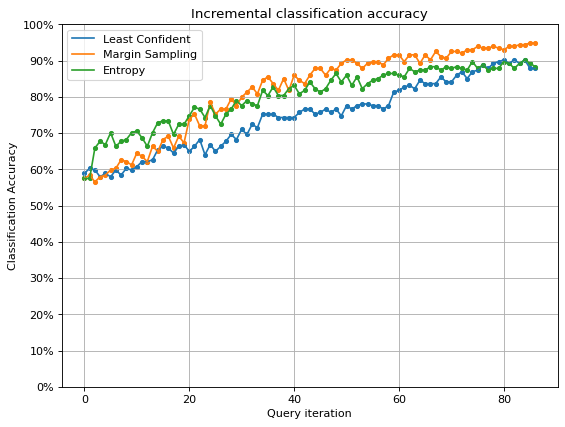

In [75]:
# 40% Additional
X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
#y_full = y_full.apply(crop_to_numeric)
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices]

learner_stream = ActiveLearner(
    estimator=RandomForestClassifier(),
    X_training=X_train, y_training=y_train,
    query_strategy = uncertainty_sampling
)
unqueried_score = learner_stream.score(X_full, y_full)
performance_history_stream_lc_40 = [unqueried_score]

X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_stream = np.delete(y_full, training_indices, axis=0)

i = 0
while(1):
    stream_idx = np.random.choice(range(len(X_stream)))
    if classifier_uncertainty(learner_stream, X_stream[stream_idx].reshape(1, -1)) >= 0.2:
        i = i+1
        learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
        new_score = learner_stream.score(X_full, y_full)
        performance_history_stream_lc_40.append(new_score)
        X_stream = np.delete(X_stream, stream_idx, axis = 0)
        y_stream = np.delete(y_stream, stream_idx, axis = 0)
        print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))
        if i == N_QUERIES_40:
            break
print("Second")
# 10% Additional
X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
#y_full = y_full.apply(crop_to_numeric)
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices]

learner_stream = ActiveLearner(
    estimator=RandomForestClassifier(),
    X_training=X_train, y_training=y_train,
    query_strategy = margin_sampling
)
unqueried_score = learner_stream.score(X_full, y_full)
performance_history_stream_margin_40 = [unqueried_score]

X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_stream = np.delete(y_full, training_indices, axis=0)

i = 0
while(1):
    stream_idx = np.random.choice(range(len(X_stream)))
    if classifier_margin(learner_stream, X_stream[stream_idx].reshape(1, -1)) <= 0.2:
        i = i+1
        learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
        new_score = learner_stream.score(X_full, y_full)
        performance_history_stream_margin_40.append(new_score)
        X_stream = np.delete(X_stream, stream_idx, axis = 0)
        y_stream = np.delete(y_stream, stream_idx, axis = 0)
        print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))
        if i == N_QUERIES_40:
            break

# 10% Additional
X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
y_full = dataset.iloc[:, -1]
X_full = X_full.to_numpy()
#y_full = y_full.apply(crop_to_numeric)
y_full = y_full.to_numpy()
X_train, y_train = X_full[training_indices], y_full[training_indices]

learner_stream = ActiveLearner(
    estimator=RandomForestClassifier(),
    X_training=X_train, y_training=y_train,
    query_strategy = entropy_sampling
)
unqueried_score = learner_stream.score(X_full, y_full)
performance_history_stream_entropy_40 = [unqueried_score]

X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
y_stream = np.delete(y_full, training_indices, axis=0)

print("Third")
i = 0
while(1):
    stream_idx = np.random.choice(range(len(X_stream)))
    if classifier_entropy(learner_stream, X_stream[stream_idx].reshape(1, -1)) >= 0.5:
        i = i+1
        learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
        new_score = learner_stream.score(X_full, y_full)
        performance_history_stream_entropy_40.append(new_score)
        X_stream = np.delete(X_stream, stream_idx, axis = 0)
        y_stream = np.delete(y_stream, stream_idx, axis = 0)
        print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))
        if i == N_QUERIES_40:
            break


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

ax.plot(performance_history_stream_lc_40, label = "Least Confident")
ax.plot(performance_history_stream_margin_40, label = "Margin Sampling")
ax.plot(performance_history_stream_entropy_40, label = "Entropy")
ax.scatter(range(len(performance_history_stream_lc_40)), performance_history_stream_lc_40, s=13)
ax.scatter(range(len(performance_history_stream_margin_40)), performance_history_stream_margin_40, s=13)
ax.scatter(range(len(performance_history_stream_entropy_40)), performance_history_stream_entropy_40, s=13)
leg = ax.legend()
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/streambased_40.png")

plt.show()       

In [ ]:
# # 10% Additional
# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# #y_full = y_full.apply(crop_to_numeric)
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices]

# learner_stream = ActiveLearner(
#     estimator=RandomForestClassifier(),
#     X_training=X_train, y_training=y_train,
#     query_strategy = uncertainty_sampling
# )
# unqueried_score = learner_stream.score(X_full, y_full)
# performance_history_stream_10 = [unqueried_score]

# X_stream = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_stream = np.delete(y_full, training_indices, axis=0)


# for index in range(N_QUERIES_10):
#     stream_idx = np.random.choice(range(len(X_stream)))
#     if classifier_uncertainty(learner_stream, X_stream[stream_idx].reshape(1, -1)) >= 0.4:
#         learner_stream.teach(X_stream[stream_idx].reshape(1, -1), y_stream[stream_idx].reshape(-1, ))
#         new_score = learner_stream.score(X_full, y_full)
#         performance_history_stream_10.append(new_score)
#         X_stream = np.delete(X_stream, stream_idx, axis = 0)
#         y_stream = np.delete(y_stream, stream_idx, axis = 0)
#         print('Row no. %d queried, new accuracy: %f' % (stream_idx, new_score))


# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

# rf = RandomForestClassifier()
# learner_margin = ActiveLearner(estimator=rf, 
#                                         X_training=X_train, y_training=y_train, 
#                                         query_strategy = classifier_margin)

# unqueried_score = learner_margin.score(X_full, y_full)
# print('Initial prediction accuracy using margin sampling: %f' % unqueried_score)

# X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_pool = np.delete(y_full, training_indices, axis=0)

# values = learner_margin.query(X_pool)
# # values.sort()

# performance_history_margin_10 = [unqueried_score]
# dicti = {}
# for i in range(N_QUERIES_10):
#     lowest_index = np.argmin(values)
#     lowest_value = values[lowest_index]
#     X, y = X_pool[lowest_index].reshape(1,-1), y_pool[lowest_index].reshape(1,)
#     learner_margin.teach(X=X, y=y)
#     model_accuracy = learner_margin.score(X_full, y_full)
#     print('Accuracy after query {n}: {acc:0.4f}'.format(n=lowest_index + 1, acc=model_accuracy))
#     performance_history_margin_10.append(model_accuracy)
#     values = np.delete(values, lowest_index)
#     dict1 = {lowest_index:lowest_value}
#     dicti.update(dict1)
    
# sort_dict = sorted(dicti.items(), key=lambda x: x[1])

# import collections

# dicti = collections.OrderedDict(sort_dict)
#  # Create list
# from matplotlib.pyplot import figure
# fig, ax = plt.subplots()
# ax.plot(list(dicti.values()))
# ax.set_xlabel("Datapoints")
# ax.set_ylabel("Informativeness")
# ax.set_title("Margin Sampling")
# ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
# ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
# plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/margin_10.png")
# plt.show()  

# X_full = dataset.iloc[:, 0:dataset.shape[1]-1]
# y_full = dataset.iloc[:, -1]
# X_full = X_full.to_numpy()
# y_full = y_full.to_numpy()
# X_train, y_train = X_full[training_indices], y_full[training_indices] # Only 10% points used to train initial model

# rf = RandomForestClassifier()
# learner_entropy = ActiveLearner(estimator=rf, 
#                                         X_training=X_train, y_training=y_train, 
#                                         query_strategy = classifier_entropy)

# unqueried_score = learner_entropy.score(X_full, y_full)
# print('Initial prediction accuracy using entropy: %f' % unqueried_score)

# X_pool = np.delete(X_full, training_indices, axis=0) #X_pool contains datapoints after removing 10% points
# y_pool = np.delete(y_full, training_indices, axis=0)

# values = learner_entropy.query(X_pool)
# # values.sort()

# performance_history_entropy_10 = [unqueried_score]
# dicti = {}
# for i in range(N_QUERIES_10):
#     top_index = np.argmax(values)
#     top_value = values[top_index]
#     X, y = X_pool[top_index].reshape(1,-1), y_pool[top_index].reshape(1,)
#     learner_entropy.teach(X=X, y=y)
#     model_accuracy = learner_entropy.score(X_full, y_full)
#     print('Accuracy after query {n}: {acc:0.4f}'.format(n=top_index + 1, acc=model_accuracy))
#     performance_history_entropy_10.append(model_accuracy)
#     values = np.delete(values, top_index)
#     dict1 = {top_index:top_value}
#     dicti.update(dict1)
    
# sort_dict = sorted(dicti.items(), key=lambda x: x[1], reverse=True)

# import collections

# dicti = collections.OrderedDict(sort_dict)
#  # Create list
# from matplotlib.pyplot import figure
# fig, ax = plt.subplots()
# ax.plot(list(dicti.values()))
# ax.set_xlabel("Datapoints")
# ax.set_ylabel("Informativeness")
# ax.set_title("Entropy")
# ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
# ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
# plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/entropy_10.png")
# plt.show()  


# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

# ax.plot(performance_history_least_confident_10, label = "Least Confident")
# ax.plot(performance_history_margin_10, label = "Margin Sampling")
# ax.plot(performance_history_entropy_10, label = "Entropy")
# ax.scatter(range(len(performance_history_least_confident_10)), performance_history_least_confident_10, s=13)
# ax.scatter(range(len(performance_history_margin_10)), performance_history_margin_10, s=13)
# ax.scatter(range(len(performance_history_entropy_10)), performance_history_entropy_10, s=13)
# leg = ax.legend()
# ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
# ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
# ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

# ax.set_ylim(bottom=0, top=1)
# ax.grid(True)

# ax.set_title('Incremental classification accuracy')
# ax.set_xlabel('Query iteration')
# ax.set_ylabel('Classification Accuracy')

# plt.savefig("/Users/MyFolders/3rd year/ML/Assignments/Assignment 2/Snapshots/stream_10.png")

# plt.show()
